# Maximizing Sports Clothing & Athleisure Revenue: A Data-Powered Analysis

![trainers in a store](trainers.jpg)

Sports clothing and athleisure attire is a huge industry, worth approximately [$193 billion in 2021](https://www.statista.com/statistics/254489/total-revenue-of-the-global-sports-apparel-market/) with a strong growth forecast over the next decade! 

In this notebook, you will undertake the role of a product analyst for an online sports clothing company. The company is specifically interested in how it can improve revenue. You will dive into product data such as pricing, reviews, descriptions, and ratings, as well as revenue and website traffic, to produce recommendations for its marketing and sales teams.  

You've been provided with four datasets to investigate:

#  brands.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `brand` | Brand of the product | 

# finance.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `listing_price` | Original price of the product | 
| `sale_price` | Discounted price of the product |
| `discount` | Discount off the listing price, as a decimal | 
| `revenue` | Revenue generated by the product |

# info.csv

| Columns | Description |
|---------|-------------|
| `product_name` | Name of the product | 
| `product_id` | Unique product identifier |
| `description` | Description of the product |

# reviews.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `rating` | Average product rating | 
| `reviews` | Number of reviews for the product |

## 1. Data Understanding
- Read the CSV files into Pandas DataFrames
- Start by understanding the structure and content of each dataset (brands.csv, finance.csv, info.csv, and reviews.csv).
- Identify common columns that can be used for joining the tables, such as product_id.


In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

brands = pd.read_csv("brands.csv") 
finance = pd.read_csv("finance.csv")
info = pd.read_csv("info.csv")
reviews = pd.read_csv("reviews.csv")

In [2]:
brands.head()

product_id   brand
0     AH2430     NaN
1     G27341  Adidas
2     CM0081  Adidas
3     B44832  Adidas
4     D98205  Adidas

In [3]:
SELECT * FROM brands WHERE product_id IS NULL

Empty DataFrame
Columns: [product_id, brand]
Index: []

In [4]:
SELECT product_id, COUNT(*) AS count FROM brands GROUP BY product_id ORDER BY 1 DESC

product_id  count
0         S82260      1
1         S80807      1
2         S80662      1
3         S78048      1
4         S75104      1
...          ...    ...
3174  310805-137      1
3175      288022      1
3176      280648      1
3177  133000-106      1
3178  130690-017      1

[3179 rows x 2 columns]

In [5]:
SELECT * FROM brands WHERE brand IS NULL

product_id brand
0       AH2430  None
1       G27996  None
2       CL7511  None
3       EH0192  None
4       EE5398  None
5       CG6104  None
6       EF0437  None
7       CK9714  None
8       CK9681  None
9       CM4827  None
10      EG9053  None
11      CL7443  None
12      EF0091  None
13      CL7643  None
14      B37538  None
15      CL7536  None
16      AQ1220  None
17      CM4619  None
18      B44882  None
19      EE6818  None
20      F34411  None
21      CQ2028  None
22      CK9464  None
23      EE4552  None
24      B28128  None
25      FW2847  None
26      EE4896  None
27      EG1727  None
28      DA8839  None
29      EE4791  None
30      B75879  None
31      FU8929  None
32      EE5415  None
33      EE5520  None
34      CL7303  None
35      BD7914  None
36      CG2925  None
37      CK1086  None
38      EE9566  None
39      B37638  None
40      G28999  None
41      DB3021  None
42      CM5937  None
43      DA9588  None
44      BB5478  None
45      CG6465  None
46      EF5432  None
47      B44705  None
48      CP8932  None
49      FW5445  None
50  AQ2730-009  None
51  CK3022-005  None
52  CT4526-100  None
53  CI9949-001  None
54  705265-006  None
55  943806-602  None
56  CI7523-002  None
57  CK2085-002  None
58  AT6817-300  None

In [6]:
finance.head()

product_id  listing_price  sale_price  discount  revenue
0     AH2430            NaN         NaN       NaN      NaN
1     G27341          75.99       37.99       0.5  1641.17
2     CM0081           9.99        5.99       0.4   398.93
3     B44832          69.99       34.99       0.5  2204.37
4     D98205          79.99       39.99       0.5  5182.70

In [7]:
SELECT * FROM finance WHERE listing_price IS NULL

product_id  listing_price  sale_price  discount  revenue
0       AH2430            NaN         NaN       NaN      NaN
1       G27996            NaN         NaN       NaN      NaN
2       CL7511            NaN         NaN       NaN      NaN
3       EH0192            NaN         NaN       NaN      NaN
4       EE5398            NaN         NaN       NaN      NaN
5       CG6104            NaN         NaN       NaN      NaN
6       EF0437            NaN         NaN       NaN      NaN
7       CK9714            NaN         NaN       NaN      NaN
8       CK9681            NaN         NaN       NaN      NaN
9       CM4827            NaN         NaN       NaN      NaN
10      EG9053            NaN         NaN       NaN      NaN
11      CL7443            NaN         NaN       NaN      NaN
12      EF0091            NaN         NaN       NaN      NaN
13      CL7643            NaN         NaN       NaN      NaN
14      B37538            NaN         NaN       NaN      NaN
15      CL7536            NaN         NaN       NaN      NaN
16      AQ1220            NaN         NaN       NaN      NaN
17      CM4619            NaN         NaN       NaN      NaN
18      B44882            NaN         NaN       NaN      NaN
19      EE6818            NaN         NaN       NaN      NaN
20      F34411            NaN         NaN       NaN      NaN
21      CQ2028            NaN         NaN       NaN      NaN
22      CK9464            NaN         NaN       NaN      NaN
23      EE4552            NaN         NaN       NaN      NaN
24      B28128            NaN         NaN       NaN      NaN
25      FW2847            NaN         NaN       NaN      NaN
26      EE4896            NaN         NaN       NaN      NaN
27      EG1727            NaN         NaN       NaN      NaN
28      DA8839            NaN         NaN       NaN      NaN
29      EE4791            NaN         NaN       NaN      NaN
30      B75879            NaN         NaN       NaN      NaN
31      FU8929            NaN         NaN       NaN      NaN
32      EE5415            NaN         NaN       NaN      NaN
33      EE5520            NaN         NaN       NaN      NaN
34      CL7303            NaN         NaN       NaN      NaN
35      BD7914            NaN         NaN       NaN      NaN
36      CG2925            NaN         NaN       NaN      NaN
37      CK1086            NaN         NaN       NaN      NaN
38      EE9566            NaN         NaN       NaN      NaN
39      B37638            NaN         NaN       NaN      NaN
40      G28999            NaN         NaN       NaN      NaN
41      DB3021            NaN         NaN       NaN      NaN
42      CM5937            NaN         NaN       NaN      NaN
43      DA9588            NaN         NaN       NaN      NaN
44      BB5478            NaN         NaN       NaN      NaN
45      CG6465            NaN         NaN       NaN      NaN
46      EF5432            NaN         NaN       NaN      NaN
47      B44705            NaN         NaN       NaN      NaN
48      CP8932            NaN         NaN       NaN      NaN
49      FW5445            NaN         NaN       NaN      NaN
50  AQ2730-009            NaN         NaN       NaN      NaN
51  CK3022-005            NaN         NaN       NaN      NaN
52  CT4526-100            NaN         NaN       NaN      NaN
53  CI9949-001            NaN         NaN       NaN      NaN
54  705265-006            NaN         NaN       NaN      NaN
55  943806-602            NaN         NaN       NaN      NaN
56  CI7523-002            NaN         NaN       NaN      NaN
57  CK2085-002            NaN         NaN       NaN      NaN
58  AT6817-300            NaN         NaN       NaN      NaN

In [8]:
SELECT * FROM finance WHERE product_id IS NULL

Empty DataFrame
Columns: [product_id, listing_price, sale_price, discount, revenue]
Index: []

In [9]:
SELECT * FROM finance WHERE discount = 0 AND listing_price != sale_price

product_id  listing_price  sale_price  discount  revenue
0    CJ1646-600           0.00       74.95       0.0     0.00
1    CT4328-101           0.00       74.95       0.0     0.00
2    CI3482-200           0.00       99.95       0.0     0.00
3    CD0479-200           0.00       99.95       0.0     0.00
4    CZ6156-101           0.00       99.95       0.0     0.00
..          ...            ...         ...       ...      ...
540  AT6100-606           0.00       64.95       0.0     0.00
541  CT9155-063           0.00      139.95       0.0   251.91
542  CI1236-100         159.95      127.97       0.0   230.35
543  AH6799-300           0.00      169.95       0.0  1223.64
544  CJ9585-600          89.95       62.97       0.0     0.00

[545 rows x 5 columns]

In [10]:
SELECT product_id, COUNT(*) AS COUNT FROM brands GROUP BY product_id ORDER BY 1 DESC

product_id  COUNT
0         S82260      1
1         S80807      1
2         S80662      1
3         S78048      1
4         S75104      1
...          ...    ...
3174  310805-137      1
3175      288022      1
3176      280648      1
3177  133000-106      1
3178  130690-017      1

[3179 rows x 2 columns]

In [11]:
info.head()

product_name  ...                                        description
0                                               NaN  ...                                                NaN
1              Women's adidas Originals Sleek Shoes  ...  A modern take on adidas sport heritage, tailor...
2                 Women's adidas Swim Puka Slippers  ...  These adidas Puka slippers for women's come wi...
3  Women's adidas Sport Inspired Questar Ride Shoes  ...  Inspired by modern tech runners, these women's...
4          Women's adidas Originals Taekwondo Shoes  ...  This design is inspired by vintage Taekwondo s...

[5 rows x 3 columns]

In [12]:
SELECT * FROM info WHERE product_name IS NULL 

product_name  product_id description
0          None      AH2430        None
1          None      G27996        None
2          None      CL7511        None
3          None      EH0192        None
4          None      EE5398        None
5          None      CG6104        None
6          None      EF0437        None
7          None      CK9714        None
8          None      CK9681        None
9          None      CM4827        None
10         None      EG9053        None
11         None      CL7443        None
12         None      EF0091        None
13         None      CL7643        None
14         None      B37538        None
15         None      CL7536        None
16         None      AQ1220        None
17         None      CM4619        None
18         None      B44882        None
19         None      EE6818        None
20         None      F34411        None
21         None      CQ2028        None
22         None      CK9464        None
23         None      EE4552        None
24         None      B28128        None
25         None      FW2847        None
26         None      EE4896        None
27         None      EG1727        None
28         None      DA8839        None
29         None      EE4791        None
30         None      B75879        None
31         None      FU8929        None
32         None      EE5415        None
33         None      EE5520        None
34         None      CL7303        None
35         None      BD7914        None
36         None      CG2925        None
37         None      CK1086        None
38         None      EE9566        None
39         None      B37638        None
40         None      G28999        None
41         None      DB3021        None
42         None      CM5937        None
43         None      DA9588        None
44         None      BB5478        None
45         None      CG6465        None
46         None      EF5432        None
47         None      B44705        None
48         None      CP8932        None
49         None      FW5445        None
50         None  AQ2730-009        None
51         None  CK3022-005        None
52         None  CT4526-100        None
53         None  CI9949-001        None
54         None  705265-006        None
55         None  943806-602        None
56         None  CI7523-002        None
57         None  CK2085-002        None
58         None  AT6817-300        None

In [13]:
SELECT * FROM info WHERE product_id IS NULL

Empty DataFrame
Columns: [product_name, product_id, description]
Index: []

In [14]:
reviews.head()

product_id  rating  reviews
0     AH2430     NaN      NaN
1     G27341     3.3     24.0
2     CM0081     2.6     37.0
3     B44832     4.1     35.0
4     D98205     3.5     72.0

In [15]:
SELECT COUNT(*) FROM reviews GROUP BY product_id ORDER BY 1 DESC

count_star()
0                1
1                1
2                1
3                1
4                1
...            ...
3174             1
3175             1
3176             1
3177             1
3178             1

[3179 rows x 1 columns]

In [16]:
SELECT * FROM reviews WHERE product_id IS NULL

Empty DataFrame
Columns: [product_id, rating, reviews]
Index: []

In [17]:
SELECT * FROM reviews WHERE rating IS NULL

product_id  rating  reviews
0       AH2430     NaN      NaN
1       G27996     NaN      NaN
2       CL7511     NaN      NaN
3       EH0192     NaN      NaN
4       EE5398     NaN      NaN
5       CG6104     NaN      NaN
6       EF0437     NaN      NaN
7       CK9714     NaN      NaN
8       CK9681     NaN      NaN
9       CM4827     NaN      NaN
10      EG9053     NaN      NaN
11      CL7443     NaN      NaN
12      EF0091     NaN      NaN
13      CL7643     NaN      NaN
14      B37538     NaN      NaN
15      CL7536     NaN      NaN
16      AQ1220     NaN      NaN
17      CM4619     NaN      NaN
18      B44882     NaN      NaN
19      EE6818     NaN      NaN
20      F34411     NaN      NaN
21      CQ2028     NaN      NaN
22      CK9464     NaN      NaN
23      EE4552     NaN      NaN
24      B28128     NaN      NaN
25      FW2847     NaN      NaN
26      EE4896     NaN      NaN
27      EG1727     NaN      NaN
28      DA8839     NaN      NaN
29      EE4791     NaN      NaN
30      B75879     NaN      NaN
31      FU8929     NaN      NaN
32      EE5415     NaN      NaN
33      EE5520     NaN      NaN
34      CL7303     NaN      NaN
35      BD7914     NaN      NaN
36      CG2925     NaN      NaN
37      CK1086     NaN      NaN
38      EE9566     NaN      NaN
39      B37638     NaN      NaN
40      G28999     NaN      NaN
41      DB3021     NaN      NaN
42      CM5937     NaN      NaN
43      DA9588     NaN      NaN
44      BB5478     NaN      NaN
45      CG6465     NaN      NaN
46      EF5432     NaN      NaN
47      B44705     NaN      NaN
48      CP8932     NaN      NaN
49      FW5445     NaN      NaN
50  AQ2730-009     NaN      NaN
51  CK3022-005     NaN      NaN
52  CT4526-100     NaN      NaN
53  CI9949-001     NaN      NaN
54  705265-006     NaN      NaN
55  943806-602     NaN      NaN
56  CI7523-002     NaN      NaN
57  CK2085-002     NaN      NaN
58  AT6817-300     NaN      NaN

## 2. Data Integration
- Use Pandas DataFrames to perform DataFrame joins


In [18]:
# Merge all four dataframes based on the 'product_id' column
# First merge df1 and df2
# brands, finance, reviews, info
merged_df = pd.merge(brands, finance, on='product_id', how='outer')

# Then merge the result with df3
merged_df = pd.merge(merged_df, info, on='product_id', how='outer')

# Finally, merge the result with df4
products = pd.merge(merged_df, reviews, on='product_id', how='outer')

products.head()

product_id   brand  ...  rating  reviews
0     AH2430     NaN  ...     NaN      NaN
1     G27341  Adidas  ...     3.3     24.0
2     CM0081  Adidas  ...     2.6     37.0
3     B44832  Adidas  ...     4.1     35.0
4     D98205  Adidas  ...     3.5     72.0

[5 rows x 10 columns]

In [19]:
SELECT * FROM products WHERE listing_price IS NULL

product_id brand  listing_price  ...  description  rating  reviews
0       AH2430  None            NaN  ...         None     NaN      NaN
1       G27996  None            NaN  ...         None     NaN      NaN
2       CL7511  None            NaN  ...         None     NaN      NaN
3       EH0192  None            NaN  ...         None     NaN      NaN
4       EE5398  None            NaN  ...         None     NaN      NaN
5       CG6104  None            NaN  ...         None     NaN      NaN
6       EF0437  None            NaN  ...         None     NaN      NaN
7       CK9714  None            NaN  ...         None     NaN      NaN
8       CK9681  None            NaN  ...         None     NaN      NaN
9       CM4827  None            NaN  ...         None     NaN      NaN
10      EG9053  None            NaN  ...         None     NaN      NaN
11      CL7443  None            NaN  ...         None     NaN      NaN
12      EF0091  None            NaN  ...         None     NaN      NaN
13      CL7643  None            NaN  ...         None     NaN      NaN
14      B37538  None            NaN  ...         None     NaN      NaN
15      CL7536  None            NaN  ...         None     NaN      NaN
16      AQ1220  None            NaN  ...         None     NaN      NaN
17      CM4619  None            NaN  ...         None     NaN      NaN
18      B44882  None            NaN  ...         None     NaN      NaN
19      EE6818  None            NaN  ...         None     NaN      NaN
20      F34411  None            NaN  ...         None     NaN      NaN
21      CQ2028  None            NaN  ...         None     NaN      NaN
22      CK9464  None            NaN  ...         None     NaN      NaN
23      EE4552  None            NaN  ...         None     NaN      NaN
24      B28128  None            NaN  ...         None     NaN      NaN
25      FW2847  None            NaN  ...         None     NaN      NaN
26      EE4896  None            NaN  ...         None     NaN      NaN
27      EG1727  None            NaN  ...         None     NaN      NaN
28      DA8839  None            NaN  ...         None     NaN      NaN
29      EE4791  None            NaN  ...         None     NaN      NaN
30      B75879  None            NaN  ...         None     NaN      NaN
31      FU8929  None            NaN  ...         None     NaN      NaN
32      EE5415  None            NaN  ...         None     NaN      NaN
33      EE5520  None            NaN  ...         None     NaN      NaN
34      CL7303  None            NaN  ...         None     NaN      NaN
35      BD7914  None            NaN  ...         None     NaN      NaN
36      CG2925  None            NaN  ...         None     NaN      NaN
37      CK1086  None            NaN  ...         None     NaN      NaN
38      EE9566  None            NaN  ...         None     NaN      NaN
39      B37638  None            NaN  ...         None     NaN      NaN
40      G28999  None            NaN  ...         None     NaN      NaN
41      DB3021  None            NaN  ...         None     NaN      NaN
42      CM5937  None            NaN  ...         None     NaN      NaN
43      DA9588  None            NaN  ...         None     NaN      NaN
44      BB5478  None            NaN  ...         None     NaN      NaN
45      CG6465  None            NaN  ...         None     NaN      NaN
46      EF5432  None            NaN  ...         None     NaN      NaN
47      B44705  None            NaN  ...         None     NaN      NaN
48      CP8932  None            NaN  ...         None     NaN      NaN
49      FW5445  None            NaN  ...         None     NaN      NaN
50  AQ2730-009  None            NaN  ...         None     NaN      NaN
51  CK3022-005  None            NaN  ...         None     NaN      NaN
52  CT4526-100  None            NaN  ...         None     NaN      NaN
53  CI9949-001  None            NaN  ...         None     NaN      NaN
54  705265-006  None            NaN  ...         None     NaN      NaN
55  943806-602  None        

product_id brand  listing_price  ...  description  rating  reviews
0       AH2430  None            NaN  ...         None     NaN      NaN
1       G27996  None            NaN  ...         None     NaN      NaN
2       CL7511  None            NaN  ...         None     NaN      NaN
3       EH0192  None            NaN  ...         None     NaN      NaN
4       EE5398  None            NaN  ...         None     NaN      NaN
5       CG6104  None            NaN  ...         None     NaN      NaN
6       EF0437  None            NaN  ...         None     NaN      NaN
7       CK9714  None            NaN  ...         None     NaN      NaN
8       CK9681  None            NaN  ...         None     NaN      NaN
9       CM4827  None            NaN  ...         None     NaN      NaN
10      EG9053  None            NaN  ...         None     NaN      NaN
11      CL7443  None            NaN  ...         None     NaN      NaN
12      EF0091  None            NaN  ...         None     NaN      NaN
13      CL7643  None            NaN  ...         None     NaN      NaN
14      B37538  None            NaN  ...         None     NaN      NaN
15      CL7536  None            NaN  ...         None     NaN      NaN
16      AQ1220  None            NaN  ...         None     NaN      NaN
17      CM4619  None            NaN  ...         None     NaN      NaN
18      B44882  None            NaN  ...         None     NaN      NaN
19      EE6818  None            NaN  ...         None     NaN      NaN
20      F34411  None            NaN  ...         None     NaN      NaN
21      CQ2028  None            NaN  ...         None     NaN      NaN
22      CK9464  None            NaN  ...         None     NaN      NaN
23      EE4552  None            NaN  ...         None     NaN      NaN
24      B28128  None            NaN  ...         None     NaN      NaN
25      FW2847  None            NaN  ...         None     NaN      NaN
26      EE4896  None            NaN  ...         None     NaN      NaN
27      EG1727  None            NaN  ...         None     NaN      NaN
28      DA8839  None            NaN  ...         None     NaN      NaN
29      EE4791  None            NaN  ...         None     NaN      NaN
30      B75879  None            NaN  ...         None     NaN      NaN
31      FU8929  None            NaN  ...         None     NaN      NaN
32      EE5415  None            NaN  ...         None     NaN      NaN
33      EE5520  None            NaN  ...         None     NaN      NaN
34      CL7303  None            NaN  ...         None     NaN      NaN
35      BD7914  None            NaN  ...         None     NaN      NaN
36      CG2925  None            NaN  ...         None     NaN      NaN
37      CK1086  None            NaN  ...         None     NaN      NaN
38      EE9566  None            NaN  ...         None     NaN      NaN
39      B37638  None            NaN  ...         None     NaN      NaN
40      G28999  None            NaN  ...         None     NaN      NaN
41      DB3021  None            NaN  ...         None     NaN      NaN
42      CM5937  None            NaN  ...         None     NaN      NaN
43      DA9588  None            NaN  ...         None     NaN      NaN
44      BB5478  None            NaN  ...         None     NaN      NaN
45      CG6465  None            NaN  ...         None     NaN      NaN
46      EF5432  None            NaN  ...         None     NaN      NaN
47      B44705  None            NaN  ...         None     NaN      NaN
48      CP8932  None            NaN  ...         None     NaN      NaN
49      FW5445  None            NaN  ...         None     NaN      NaN
50  AQ2730-009  None            NaN  ...         None     NaN      NaN
51  CK3022-005  None            NaN  ...         None     NaN      NaN
52  CT4526-100  None            NaN  ...         None     NaN      NaN
53  CI9949-001  None            NaN  ...         None     NaN      NaN
54  705265-006  None            NaN  ...         None     NaN      NaN
55  943806-602  None        

In [20]:
# Drop 'product_id' that have no listing_price (Assumption: Not being sold online)
# df = df.dropna(subset=['listing_price'])
products = products.dropna(subset=['listing_price'])

products.head()

product_id   brand  ...  rating  reviews
1     G27341  Adidas  ...     3.3     24.0
2     CM0081  Adidas  ...     2.6     37.0
3     B44832  Adidas  ...     4.1     35.0
4     D98205  Adidas  ...     3.5     72.0
5     B75586  Adidas  ...     1.0     45.0

[5 rows x 10 columns]

## 3. Data Exploration and Analysis
- After joining the tables, start exploring the merged dataset to understand the relationships between the data.
- Calculate basic statistics, such as mean, median, and standard deviation of revenue, ratings, and reviews.
- Create visualizations to better understand the data, such as histograms, scatter plots, or bar charts.

### General Statistic Calculations

In [21]:
# Calculating basic statistics for revenue, ratings, and reviews
revenue_stats = products['revenue'].describe()
rating_stats = products['rating'].describe()
reviews_stats = products['reviews'].describe()

print(f'Summary of Revenue Stats: \n{revenue_stats}\n')
print(f'Summary of Rating Stats: \n{rating_stats}\n')
print(f'Summary of Review Stats:\n{reviews_stats}\n')

Summary of Revenue Stats: 
count     3120.000000
mean      3951.571263
std       4440.312551
min          0.000000
25%        863.890000
50%       2735.280000
75%       5345.015000
max      64203.930000
Name: revenue, dtype: float64

Summary of Rating Stats: 
count    3120.000000
mean        3.265801
std         1.392685
min         0.000000
25%         2.600000
50%         3.500000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

Summary of Review Stats:
count    3120.000000
mean       41.545513
std        31.361668
min         0.000000
25%        12.000000
50%        39.000000
75%        69.000000
max       223.000000
Name: reviews, dtype: float64



In [22]:
SELECT brand, COUNT(*) AS count, ROUND(AVG(rating),1) AS avg_rating FROM products GROUP BY brand

brand  count  avg_rating
0  Adidas   2575         3.4
1    Nike    545         2.8

In [23]:
SELECT brand, COUNT(*) AS count, ROUND(AVG(rating),1) AS avg_rating FROM products WHERE revenue > 0 GROUP BY brand

brand  count  avg_rating
0  Adidas   2550         3.4
1    Nike    358         4.2

In [24]:
SELECT brand, COUNT(*) AS count, ROUND(AVG(rating),1) AS avg_rating FROM products WHERE reviews > 0 GROUP BY brand

brand  count  avg_rating
0  Adidas   2550         3.4
1    Nike    358         4.2

In [25]:
SELECT * FROM products WHERE reviews > 0 AND revenue = 0

Empty DataFrame
Columns: [product_id, brand, listing_price, sale_price, discount, revenue, product_name, description, rating, reviews]
Index: []

In [26]:
SELECT * FROM products WHERE rating = 0 AND revenue > 0

Below are the number of products that didn't sell

In [27]:
SELECT brand, COUNT(*) AS count FROM products WHERE revenue = 0 AND (listing_price > 0 OR sale_price > 0) GROUP BY brand

brand  count
0  Adidas     25
1    Nike    187

In [232]:
SELECT * FROM products WHERE revenue = 0 AND listing_price = 0

product_id brand  ...  rating  reviews
0    CJ1646-600  Nike  ...     0.0      0.0
1    CT4328-101  Nike  ...     0.0      0.0
2    CI3482-200  Nike  ...     0.0      0.0
3    CD0479-200  Nike  ...     0.0      0.0
4    CZ6156-101  Nike  ...     0.0      0.0
..          ...   ...  ...     ...      ...
131  CQ7620-001  Nike  ...     0.0      0.0
132  CJ0842-600  Nike  ...     0.0      0.0
133  CI3867-001  Nike  ...     0.0      0.0
134  AT7968-606  Nike  ...     0.0      0.0
135  AT6100-606  Nike  ...     0.0      0.0

[136 rows x 10 columns]

In [233]:
SELECT * FROM products WHERE revenue = 0 AND sale_price = 0

Empty DataFrame
Columns: [product_id, brand, listing_price, sale_price, discount, revenue, product_name, description, rating, reviews]
Index: []

In [30]:
SELECT * FROM products WHERE sale_price IS NULL 

In [31]:
SELECT * FROM products WHERE revenue = 0 AND (listing_price > 0 OR sale_price > 0) AND rating > 0

product_id   brand  ...  rating  reviews
0      CL7507  Adidas  ...     4.8      0.0
1      CK9678  Adidas  ...     1.5      0.0
2      CM0014  Adidas  ...     4.5      0.0
3      EE9728  Adidas  ...     3.7      0.0
4      CL9968  Adidas  ...     4.9      0.0
5      CM4692  Adidas  ...     4.0      0.0
6      EE4572  Adidas  ...     4.1      0.0
7      D96553  Adidas  ...     3.5      0.0
8      AQ1134  Adidas  ...     3.6      0.0
9      CI2606  Adidas  ...     2.9      0.0
10     F36671  Adidas  ...     4.4      0.0
11     CM4842  Adidas  ...     2.5      0.0
12     AH2156  Adidas  ...     2.7      0.0
13     FV2875  Adidas  ...     4.5      0.0
14     B41648  Adidas  ...     2.0      0.0
15     FV2480  Adidas  ...     3.8      0.0
16     CI1935  Adidas  ...     1.0      0.0
17     F34407  Adidas  ...     4.2      0.0
18     CI9718  Adidas  ...     3.0      0.0
19     EE4962  Adidas  ...     2.8      0.0
20     CK1083  Adidas  ...     2.7      0.0
21     EG4344  Adidas  ...     4.7      0.0
22     F34408  Adidas  ...     2.7      0.0
23     EG0964  Adidas  ...     2.0      0.0

[24 rows x 10 columns]

In [32]:
SELECT * FROM products WHERE revenue = 0 AND (listing_price > 0 OR sale_price > 0) AND reviews > 0

Empty DataFrame
Columns: [product_id, brand, listing_price, sale_price, discount, revenue, product_name, description, rating, reviews]
Index: []

In [33]:
SELECT * FROM products WHERE revenue = 0 AND (listing_price > 0 OR sale_price > 0) AND rating = 0

product_id   brand  ...  rating  reviews
0        EG7155  Adidas  ...     0.0      0.0
1    CI3707-100    Nike  ...     0.0      0.0
2    CQ6569-001    Nike  ...     0.0      0.0
3    CI3703-401    Nike  ...     0.0      0.0
4    CK5669-400    Nike  ...     0.0      0.0
..          ...     ...  ...     ...      ...
183  CQ7620-001    Nike  ...     0.0      0.0
184  CJ0842-600    Nike  ...     0.0      0.0
185  CI3867-001    Nike  ...     0.0      0.0
186  AT7968-606    Nike  ...     0.0      0.0
187  AT6100-606    Nike  ...     0.0      0.0

[188 rows x 10 columns]

product_id   brand  ...  rating  reviews
0        EG7155  Adidas  ...     0.0      0.0
1    CI3707-100    Nike  ...     0.0      0.0
2    CQ6569-001    Nike  ...     0.0      0.0
3    CI3703-401    Nike  ...     0.0      0.0
4    CK5669-400    Nike  ...     0.0      0.0
..          ...     ...  ...     ...      ...
183  CQ7620-001    Nike  ...     0.0      0.0
184  CJ0842-600    Nike  ...     0.0      0.0
185  CI3867-001    Nike  ...     0.0      0.0
186  AT7968-606    Nike  ...     0.0      0.0
187  AT6100-606    Nike  ...     0.0      0.0

[188 rows x 10 columns]

In [34]:
SELECT * FROM products WHERE revenue = 0 AND rating = 0 AND reviews = 0

product_id   brand  ...  rating  reviews
0        EG7155  Adidas  ...     0.0      0.0
1    CJ1646-600    Nike  ...     0.0      0.0
2    CT4328-101    Nike  ...     0.0      0.0
3    CI3482-200    Nike  ...     0.0      0.0
4    CD0479-200    Nike  ...     0.0      0.0
..          ...     ...  ...     ...      ...
183  CI3867-001    Nike  ...     0.0      0.0
184  CQ0278-200    Nike  ...     0.0      0.0
185  AT7968-606    Nike  ...     0.0      0.0
186  AT6100-606    Nike  ...     0.0      0.0
187  CJ9585-600    Nike  ...     0.0      0.0

[188 rows x 10 columns]

In [35]:
SELECT * FROM products WHERE discount = 0 AND listing_price != sale_price AND listing_price != 0 AND revenue > 0 

product_id brand  ...  rating  reviews
0    923112-001  Nike  ...     4.2      6.0
1    CI1718-001  Nike  ...     5.0      2.0
2    AO4971-700  Nike  ...     3.9     33.0
3    AV2605-101  Nike  ...     3.7     27.0
4    AQ5707-001  Nike  ...     3.9     10.0
..          ...   ...  ...     ...      ...
135  BV1021-007  Nike  ...     4.7     10.0
136  807443-503  Nike  ...     3.7      3.0
137  AR4347-600  Nike  ...     1.0      1.0
138  BV7757-500  Nike  ...     5.0      1.0
139  CI1236-100  Nike  ...     5.0      1.0

[140 rows x 10 columns]

In [36]:
# Clean up issues with discount field

# Round the 'accur_discount' column to the 4th decimal place
products['sale_price_percent'] = (1 - (products['listing_price'] - products['sale_price']) / products['listing_price']).round(2)

Below are the producst the team should considering dropping since there is no revenue

In [37]:
SELECT * FROM products WHERE rating > 0 AND reviews = 0

product_id   brand  listing_price  ...  rating  reviews  sale_price_percent
0      CL7507  Adidas          49.99  ...     4.8      0.0                 0.5
1      CK9678  Adidas          49.99  ...     1.5      0.0                 0.5
2      CM0014  Adidas          49.99  ...     4.5      0.0                 0.5
3      EE9728  Adidas          55.99  ...     3.7      0.0                 0.6
4      CL9968  Adidas          27.99  ...     4.9      0.0                 0.6
5      CM4692  Adidas          37.99  ...     4.0      0.0                 1.0
6      EE4572  Adidas          75.99  ...     4.1      0.0                 0.6
7      D96553  Adidas          89.99  ...     3.5      0.0                 0.5
8      AQ1134  Adidas          79.99  ...     3.6      0.0                 0.6
9      CI2606  Adidas          14.99  ...     2.9      0.0                 0.4
10     F36671  Adidas          79.99  ...     4.4      0.0                 0.6
11     CM4842  Adidas          55.99  ...     2.5      0.0                 1.0
12     AH2156  Adidas          69.99  ...     2.7      0.0                 0.5
13     FV2875  Adidas          79.99  ...     4.5      0.0                 1.0
14     B41648  Adidas          79.99  ...     2.0      0.0                 0.5
15     FV2480  Adidas         139.99  ...     3.8      0.0                 1.0
16     CI1935  Adidas          45.99  ...     1.0      0.0                 0.4
17     F34407  Adidas         149.99  ...     4.2      0.0                 0.6
18     CI9718  Adidas          59.99  ...     3.0      0.0                 0.5
19     EE4962  Adidas          75.99  ...     2.8      0.0                 0.6
20     CK1083  Adidas          59.99  ...     2.7      0.0                 0.5
21     EG4344  Adidas          59.99  ...     4.7      0.0                 1.0
22     F34408  Adidas         149.99  ...     2.7      0.0                 0.6
23     EG0964  Adidas          59.99  ...     2.0      0.0                 1.0

[24 rows x 11 columns]

In [38]:
SELECT * FROM products WHERE reviews > 0 AND revenue == 0

Empty DataFrame
Columns: [product_id, brand, listing_price, sale_price, discount, revenue, product_name, description, rating, reviews, sale_price_percent]
Index: []

In [243]:
SELECT * FROM products WHERE revenue = 0 and rating > 0

product_id   brand  listing_price  ...  rating  reviews  sale_price_percent
0      CL7507  Adidas          49.99  ...     4.8      0.0                 0.5
1      CK9678  Adidas          49.99  ...     1.5      0.0                 0.5
2      CM0014  Adidas          49.99  ...     4.5      0.0                 0.5
3      EE9728  Adidas          55.99  ...     3.7      0.0                 0.6
4      CL9968  Adidas          27.99  ...     4.9      0.0                 0.6
5      CM4692  Adidas          37.99  ...     4.0      0.0                 1.0
6      EE4572  Adidas          75.99  ...     4.1      0.0                 0.6
7      D96553  Adidas          89.99  ...     3.5      0.0                 0.5
8      AQ1134  Adidas          79.99  ...     3.6      0.0                 0.6
9      CI2606  Adidas          14.99  ...     2.9      0.0                 0.4
10     F36671  Adidas          79.99  ...     4.4      0.0                 0.6
11     CM4842  Adidas          55.99  ...     2.5      0.0                 1.0
12     AH2156  Adidas          69.99  ...     2.7      0.0                 0.5
13     FV2875  Adidas          79.99  ...     4.5      0.0                 1.0
14     B41648  Adidas          79.99  ...     2.0      0.0                 0.5
15     FV2480  Adidas         139.99  ...     3.8      0.0                 1.0
16     CI1935  Adidas          45.99  ...     1.0      0.0                 0.4
17     F34407  Adidas         149.99  ...     4.2      0.0                 0.6
18     CI9718  Adidas          59.99  ...     3.0      0.0                 0.5
19     EE4962  Adidas          75.99  ...     2.8      0.0                 0.6
20     CK1083  Adidas          59.99  ...     2.7      0.0                 0.5
21     EG4344  Adidas          59.99  ...     4.7      0.0                 1.0
22     F34408  Adidas         149.99  ...     2.7      0.0                 0.6
23     EG0964  Adidas          59.99  ...     2.0      0.0                 1.0

[24 rows x 11 columns]

In [40]:
SELECT * FROM products WHERE rating = 0 AND revenue > 0 AND reviews = 0

Empty DataFrame
Columns: [product_id, brand, listing_price, sale_price, discount, revenue, product_name, description, rating, reviews, sale_price_percent]
Index: []

In [245]:
SELECT * FROM products WHERE reviews = 0 AND revenue = 0

product_id   brand  listing_price  ...  rating  reviews  sale_price_percent
0        CL7507  Adidas          49.99  ...     4.8      0.0                 0.5
1        CK9678  Adidas          49.99  ...     1.5      0.0                 0.5
2        CM0014  Adidas          49.99  ...     4.5      0.0                 0.5
3        EE9728  Adidas          55.99  ...     3.7      0.0                 0.6
4        CL9968  Adidas          27.99  ...     4.9      0.0                 0.6
..          ...     ...            ...  ...     ...      ...                 ...
207  CI3867-001    Nike           0.00  ...     0.0      0.0                 inf
208  CQ0278-200    Nike          89.95  ...     0.0      0.0                 0.8
209  AT7968-606    Nike           0.00  ...     0.0      0.0                 inf
210  AT6100-606    Nike           0.00  ...     0.0      0.0                 inf
211  CJ9585-600    Nike          89.95  ...     0.0      0.0                 0.7

[212 rows x 11 columns]

In [42]:
SELECT * FROM products WHERE revenue = 0 and rating > 0

product_id   brand  listing_price  ...  rating  reviews  sale_price_percent
0      CL7507  Adidas          49.99  ...     4.8      0.0                 0.5
1      CK9678  Adidas          49.99  ...     1.5      0.0                 0.5
2      CM0014  Adidas          49.99  ...     4.5      0.0                 0.5
3      EE9728  Adidas          55.99  ...     3.7      0.0                 0.6
4      CL9968  Adidas          27.99  ...     4.9      0.0                 0.6
5      CM4692  Adidas          37.99  ...     4.0      0.0                 1.0
6      EE4572  Adidas          75.99  ...     4.1      0.0                 0.6
7      D96553  Adidas          89.99  ...     3.5      0.0                 0.5
8      AQ1134  Adidas          79.99  ...     3.6      0.0                 0.6
9      CI2606  Adidas          14.99  ...     2.9      0.0                 0.4
10     F36671  Adidas          79.99  ...     4.4      0.0                 0.6
11     CM4842  Adidas          55.99  ...     2.5      0.0                 1.0
12     AH2156  Adidas          69.99  ...     2.7      0.0                 0.5
13     FV2875  Adidas          79.99  ...     4.5      0.0                 1.0
14     B41648  Adidas          79.99  ...     2.0      0.0                 0.5
15     FV2480  Adidas         139.99  ...     3.8      0.0                 1.0
16     CI1935  Adidas          45.99  ...     1.0      0.0                 0.4
17     F34407  Adidas         149.99  ...     4.2      0.0                 0.6
18     CI9718  Adidas          59.99  ...     3.0      0.0                 0.5
19     EE4962  Adidas          75.99  ...     2.8      0.0                 0.6
20     CK1083  Adidas          59.99  ...     2.7      0.0                 0.5
21     EG4344  Adidas          59.99  ...     4.7      0.0                 1.0
22     F34408  Adidas         149.99  ...     2.7      0.0                 0.6
23     EG0964  Adidas          59.99  ...     2.0      0.0                 1.0

[24 rows x 11 columns]

### Feature Engineering

In [43]:
# Define gender-related keywords
gender_keywords = {'women': 'female', "women's": 'female', 'men': 'male', "men's": 'male'}

# Create a function to categorize descriptions
def categorize_gender(description):
    if isinstance(description, str):  # Check if the description is a string
        for keyword, gender in gender_keywords.items():
            if keyword in description.lower():
                return gender
    return 'unspecified'  # Default if no keyword found or NaN

# Apply the function to create a new column
products['gender_category'] = products['product_name'].apply(categorize_gender)

In [44]:
SELECT gender_category, COUNT(*) AS count, ROUND(AVG(revenue),1) AS avg_revenue, ROUND(AVG(rating),1) AS avg_rating, ROUND(AVG(reviews),1) AS avg_reviews FROM products GROUP BY 1

In [45]:
# Drop columns without revenue and ratings (also without reviews) to reduce skew
# Assuming 'df' is your DataFrame
no_rrr = products.drop(products[(products['reviews'] == 0) & (products['revenue'] == 0) & (products['rating'] == 0)].index, axis=0)

no_rrr.head()

product_id   brand  ...  sale_price_percent  gender_category
1     G27341  Adidas  ...                 0.5           female
2     CM0081  Adidas  ...                 0.6           female
3     B44832  Adidas  ...                 0.5           female
4     D98205  Adidas  ...                 0.5           female
5     B75586  Adidas  ...                 0.4           female

[5 rows x 12 columns]

In [46]:
SELECT brand, COUNT(*) AS count, ROUND(AVG(rating),1) AS avg_rating FROM no_rrr GROUP BY brand

brand  count  avg_rating
0  Adidas   2574         3.4
1    Nike    358         4.2

In [47]:
# Drop columns without revenue to not skew data (assume they are not buying from the site)
no_rev = products[products['revenue'] > 0]

In [48]:
SELECT brand, COUNT(*) AS count, ROUND(AVG(rating),1) AS avg_rating FROM no_rev GROUP BY brand

brand  count  avg_rating
0  Adidas   2550         3.4
1    Nike    358         4.2

In [49]:
SELECT * FROM products WHERE revenue = 0 ORDER BY rating

product_id   brand  ...  sale_price_percent  gender_category
0    CJ1646-600    Nike  ...                 inf      unspecified
1    CT4328-101    Nike  ...                 inf      unspecified
2    CI3482-200    Nike  ...                 inf      unspecified
3    CD0479-200    Nike  ...                 inf      unspecified
4    CZ6156-101    Nike  ...                 inf      unspecified
..          ...     ...  ...                 ...              ...
207      CM0014  Adidas  ...                 0.5             male
208      FV2875  Adidas  ...                 1.0             male
209      EG4344  Adidas  ...                 1.0             male
210      CL7507  Adidas  ...                 0.5             male
211      CL9968  Adidas  ...                 0.6           female

[212 rows x 12 columns]

### General Data Visualizations

In [50]:
# Brand product dfs
adidas = products[products['brand'] == 'Adidas']
nike = products[products['brand'] == 'Nike']

In [51]:
# Drop Nike outlier
nike_wo60k = nike[nike['revenue'] < 60000]

### Histograms

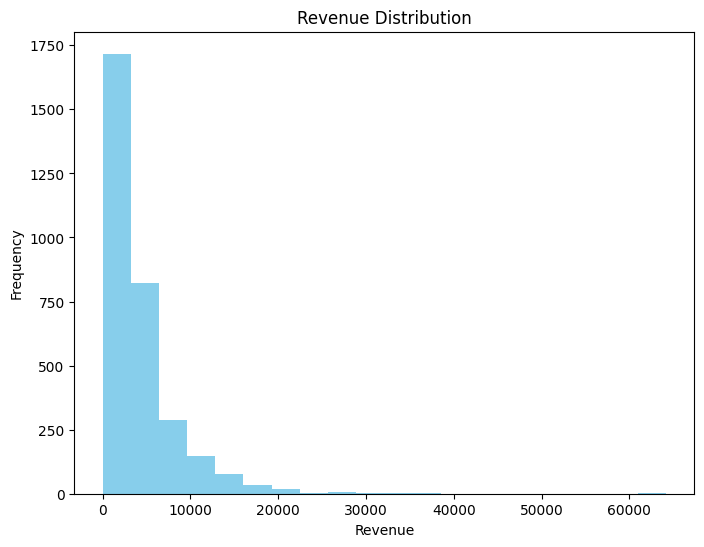

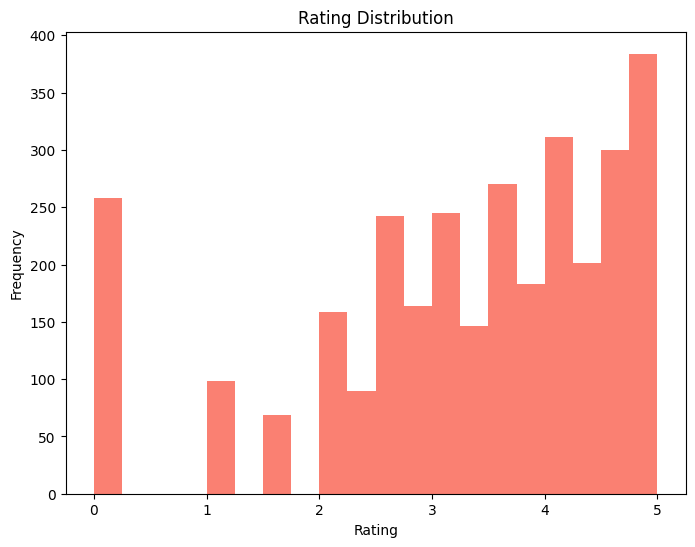

In [52]:
# Histograms: Visualize the distribution of numerical variables
plt.figure(figsize=(8, 6))
plt.hist(products['revenue'], bins=20, color='skyblue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(products['rating'], bins=20, color='salmon')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(products['reviews'], bins=20, color='lightgreen')
plt.title('Reviews Distribution')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()

In [53]:
SELECT * FROM products WHERE reviews < 2 ORDER BY 1 ASC

product_id   brand  ...  sale_price_percent  gender_category
0    133000-106    Nike  ...                 inf      unspecified
1    554724-050    Nike  ...                 inf      unspecified
2    832655-001    Nike  ...                 inf      unspecified
3    844127-108    Nike  ...                 inf      unspecified
4    844896-002    Nike  ...                 0.8      unspecified
..          ...     ...  ...                 ...              ...
319      FV2875  Adidas  ...                 1.0             male
320      FV4284  Adidas  ...                 1.0             male
321      FV4417  Adidas  ...                 1.0             male
322      FW1970  Adidas  ...                 1.0             male
323      G26170  Adidas  ...                 0.6             male

[324 rows x 12 columns]

In [54]:
SELECT * FROM products WHERE listing_price = 0

product_id brand  ...  sale_price_percent  gender_category
0    CJ1646-600  Nike  ...                 inf      unspecified
1    CT4328-101  Nike  ...                 inf      unspecified
2    CI3482-200  Nike  ...                 inf      unspecified
3    CD0479-200  Nike  ...                 inf      unspecified
4    CZ6156-101  Nike  ...                 inf      unspecified
..          ...   ...  ...                 ...              ...
349  AT7968-606  Nike  ...                 inf      unspecified
350  CD2722-001  Nike  ...                 inf      unspecified
351  AT6100-606  Nike  ...                 inf      unspecified
352  CT9155-063  Nike  ...                 inf      unspecified
353  AH6799-300  Nike  ...                 inf      unspecified

[354 rows x 12 columns]

In [55]:
SELECT * FROM products WHERE listing_price = 0 AND revenue = 0 ORDER BY sale_price

product_id brand  ...  sale_price_percent  gender_category
0    832655-001  Nike  ...                 inf      unspecified
1    AO3622-006  Nike  ...                 inf      unspecified
2    CT0624-100  Nike  ...                 inf      unspecified
3    AT6107-606  Nike  ...                 inf      unspecified
4    CD0189-001  Nike  ...                 inf      unspecified
..          ...   ...  ...                 ...              ...
131  CD6720-808  Nike  ...                 inf      unspecified
132  AT7898-104  Nike  ...                 inf      unspecified
133  CD6721-808  Nike  ...                 inf      unspecified
134  CT1099-093  Nike  ...                 inf      unspecified
135  AT5673-700  Nike  ...                 inf      unspecified

[136 rows x 12 columns]

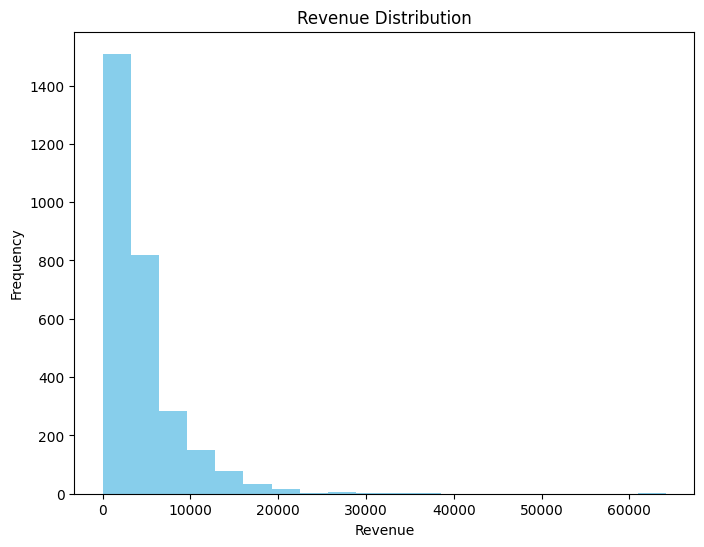

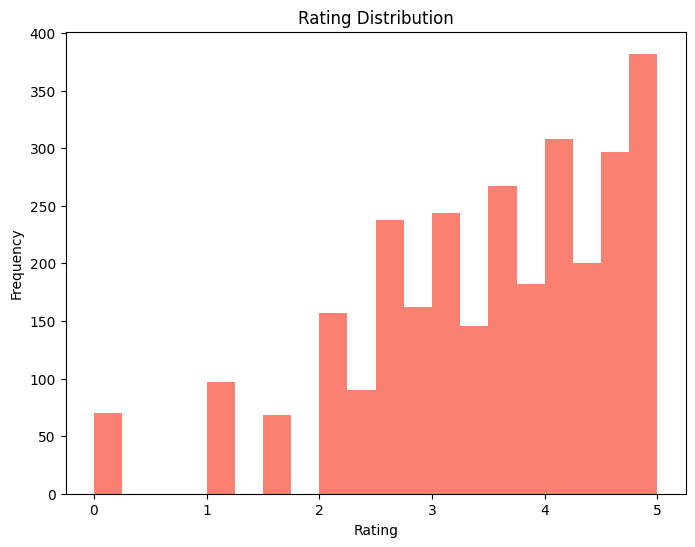

In [56]:
# Histograms: Visualize the distribution of numerical variables
plt.figure(figsize=(8, 6))
plt.hist(no_rev['revenue'], bins=20, color='skyblue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(no_rev['rating'], bins=20, color='salmon')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(no_rev['reviews'], bins=20, color='lightgreen')
plt.title('Reviews Distribution')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()

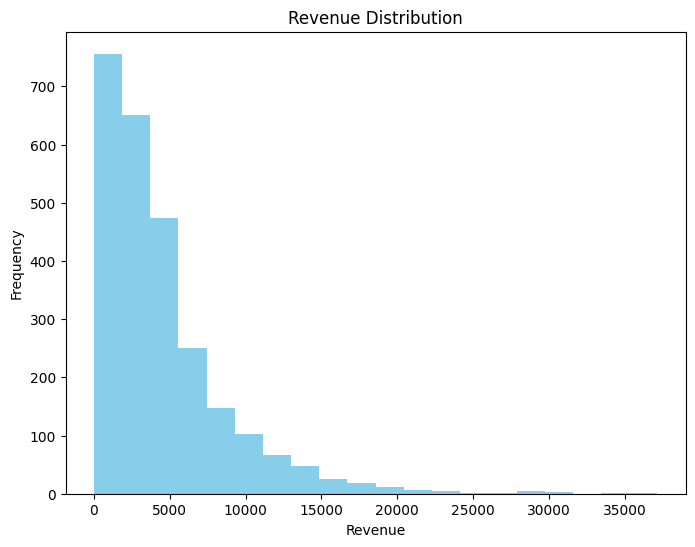

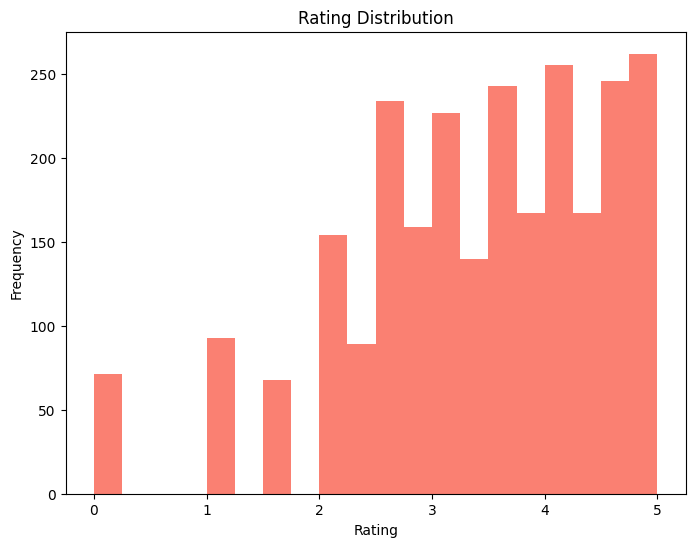

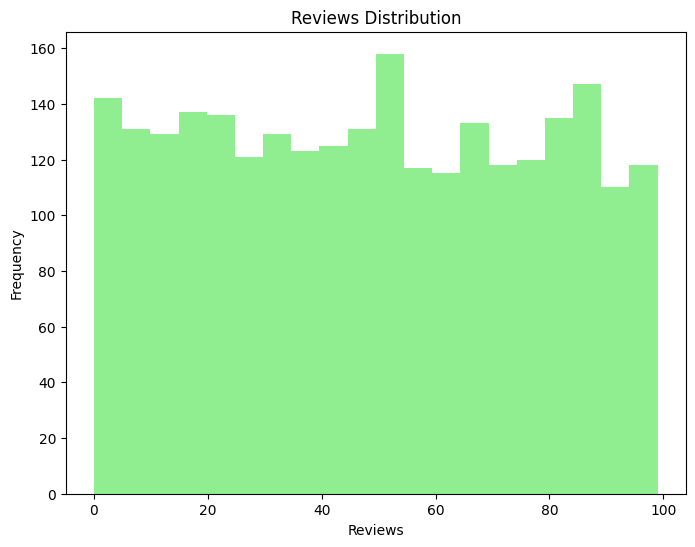

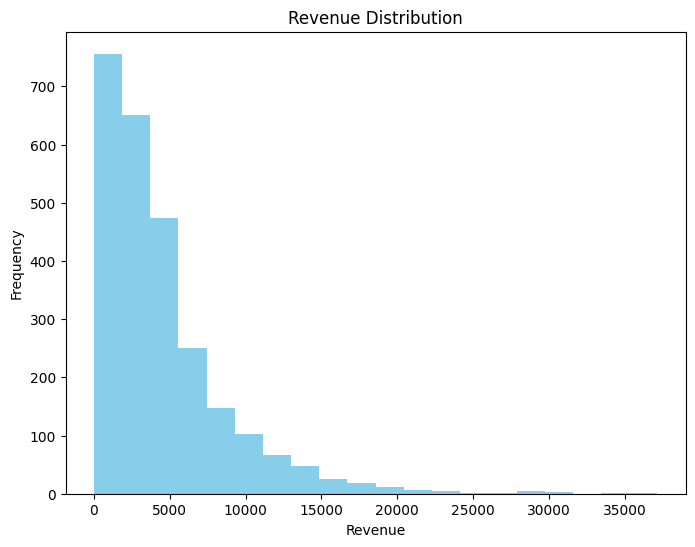

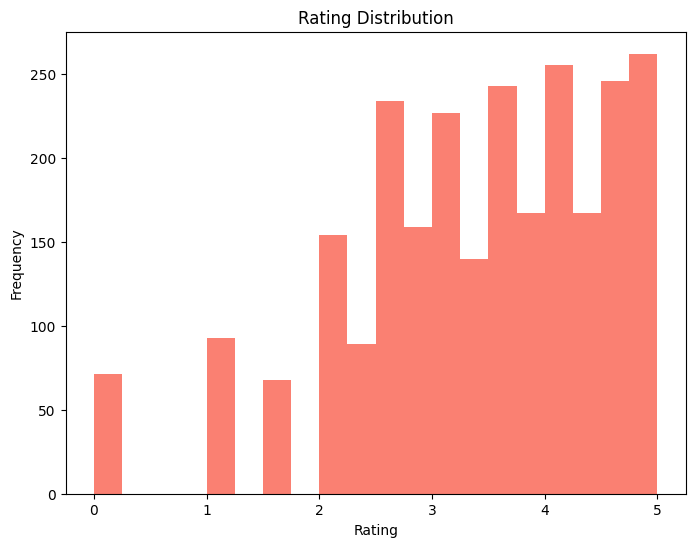

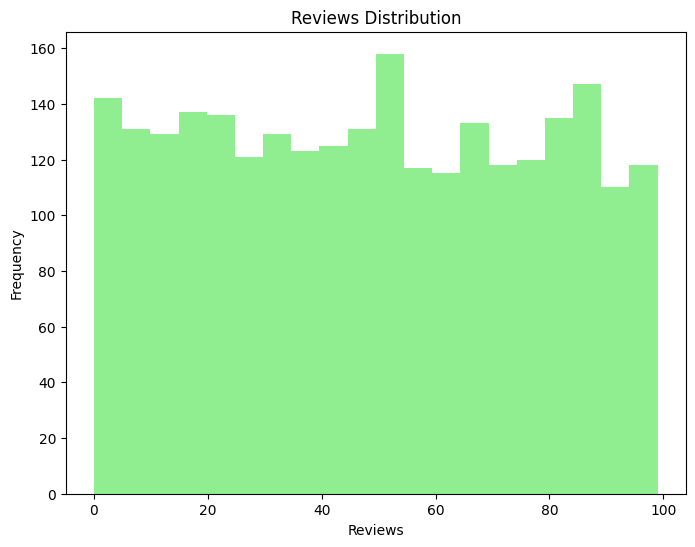

In [57]:
# Histograms: Visualize the distribution of numerical variables
plt.figure(figsize=(8, 6))
plt.hist(adidas['revenue'], bins=20, color='skyblue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(adidas['rating'], bins=20, color='salmon')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(adidas['reviews'], bins=20, color='lightgreen')
plt.title('Reviews Distribution')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()

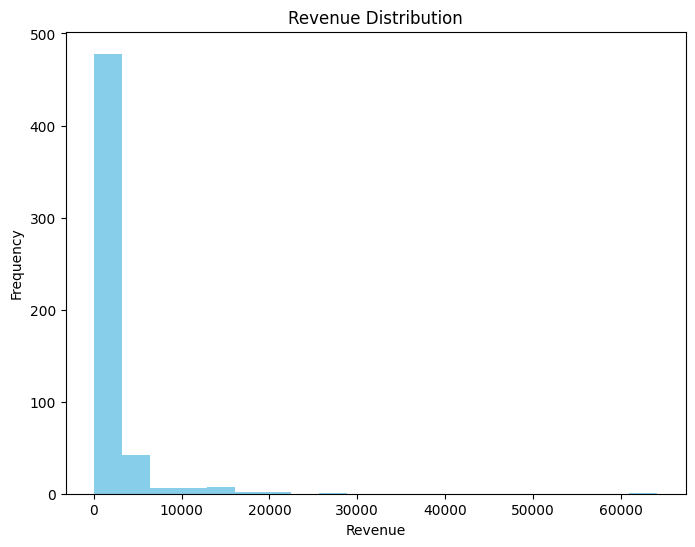

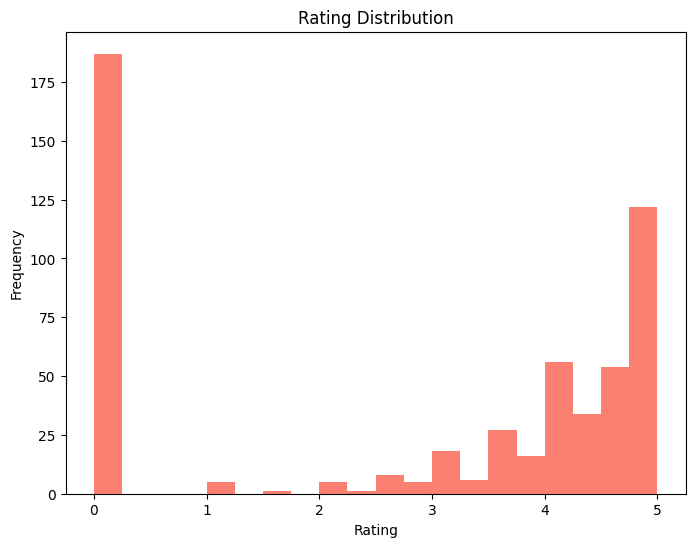

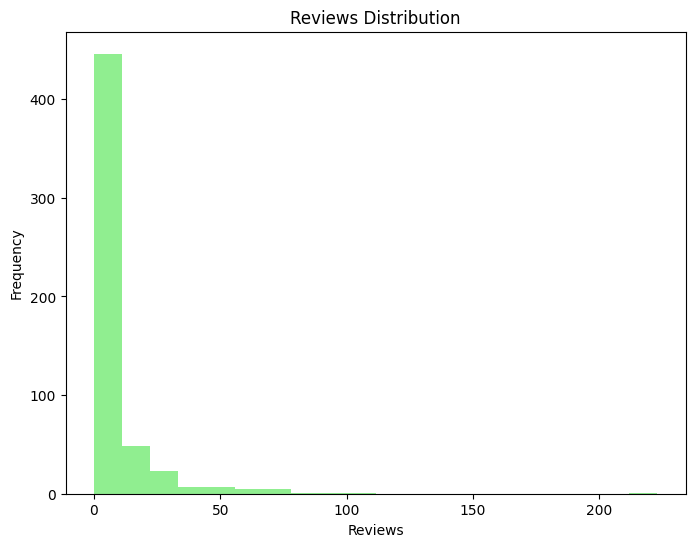

In [58]:
# Histograms: Visualize the distribution of numerical variables
plt.figure(figsize=(8, 6))
plt.hist(nike['revenue'], bins=20, color='skyblue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(nike['rating'], bins=20, color='salmon')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(nike['reviews'], bins=20, color='lightgreen')
plt.title('Reviews Distribution')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()

In [59]:
# Without the no revenue based products
adidas_sans0rev = adidas[adidas['revenue'] > 0]
nike_sans0rev = nike[nike['revenue'] > 0]

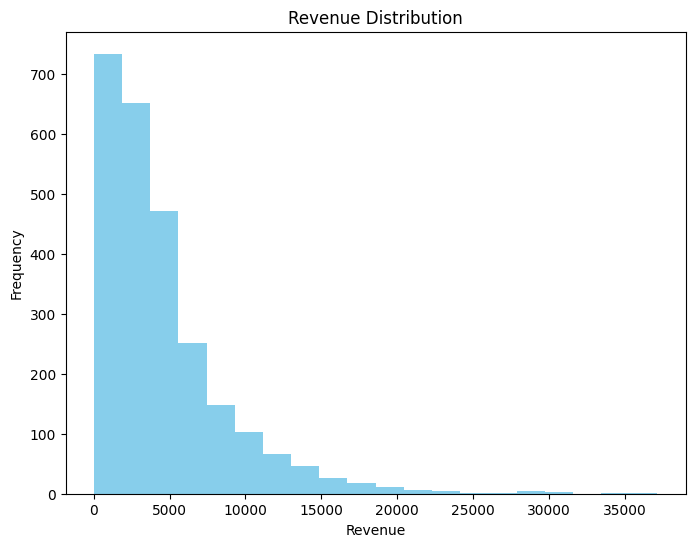

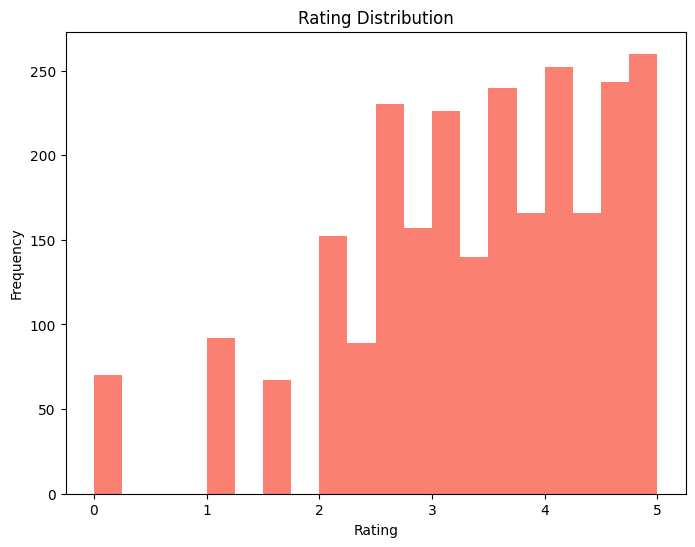

In [264]:
# Histograms: Visualize the distribution of numerical variables
plt.figure(figsize=(8, 6))
plt.hist(adidas_sans0rev['revenue'], bins=20, color='skyblue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(adidas_sans0rev['rating'], bins=20, color='salmon')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(adidas_sans0rev['reviews'], bins=20, color='lightgreen')
plt.title('Reviews Distribution')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()

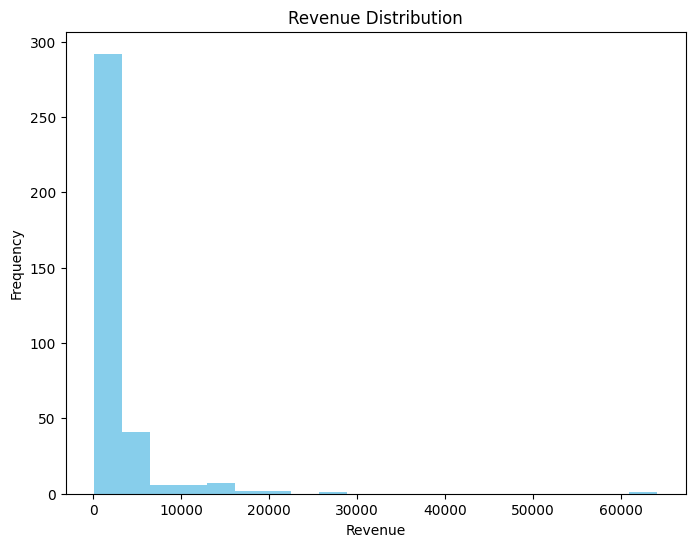

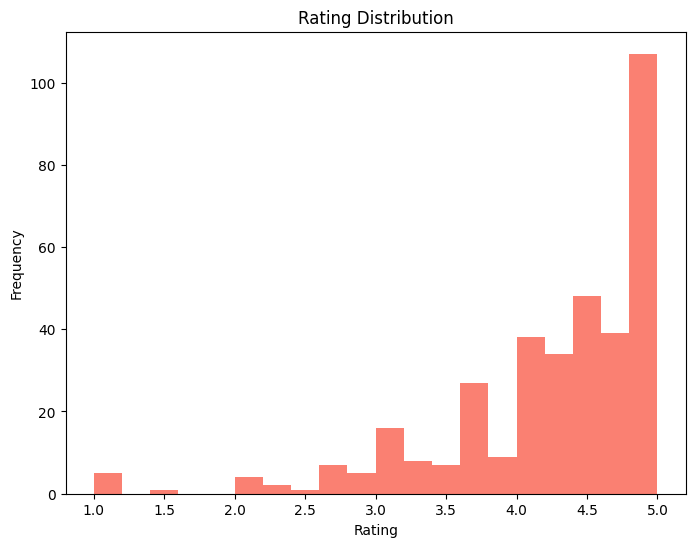

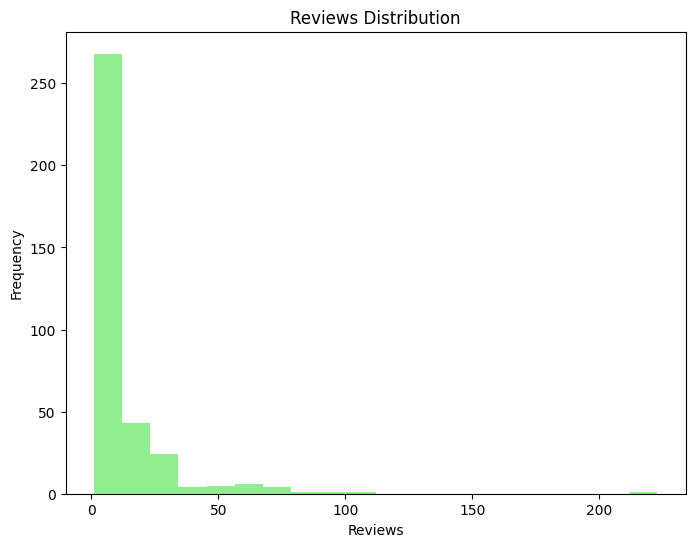

In [61]:
# Histograms: Visualize the distribution of numerical variables
plt.figure(figsize=(8, 6))
plt.hist(nike_sans0rev['revenue'], bins=20, color='skyblue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(nike_sans0rev['rating'], bins=20, color='salmon')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(nike_sans0rev['reviews'], bins=20, color='lightgreen')
plt.title('Reviews Distribution')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()

In [62]:
SELECT * FROM adidas_sans0rev ORDER BY revenue DESC, rating ASC

product_id   brand  ...  sale_price_percent  gender_category
0        FV7826  Adidas  ...                 1.0      unspecified
1        FV6794  Adidas  ...                 1.0      unspecified
2        EG5185  Adidas  ...                 1.0             male
3        EF9623  Adidas  ...                 1.0             male
4        EF0893  Adidas  ...                 1.0             male
...         ...     ...  ...                 ...              ...
2545     CI9935  Adidas  ...                 0.4             male
2546     CL7308  Adidas  ...                 0.5             male
2547     CM0093  Adidas  ...                 0.6           female
2548     CM0051  Adidas  ...                 0.6             male
2549     CM0106  Adidas  ...                 0.5             male

[2550 rows x 12 columns]

In [63]:
SELECT * FROM nike_sans0rev ORDER BY revenue DESC, rating ASC

product_id brand  ...  sale_price_percent  gender_category
0    310805-137  Nike  ...                 inf      unspecified
1    880848-005  Nike  ...                 inf      unspecified
2    849559-004  Nike  ...                 inf      unspecified
3    AH8050-100  Nike  ...                 inf      unspecified
4    CD4371-001  Nike  ...                 inf      unspecified
..          ...   ...  ...                 ...              ...
353  AJ6959-717  Nike  ...                0.75      unspecified
354  844127-108  Nike  ...                 inf      unspecified
355  CD2803-001  Nike  ...                 inf      unspecified
356  AT6110-004  Nike  ...                0.70      unspecified
357  BQ9138-601  Nike  ...                0.70      unspecified

[358 rows x 12 columns]

## Scatter Plots

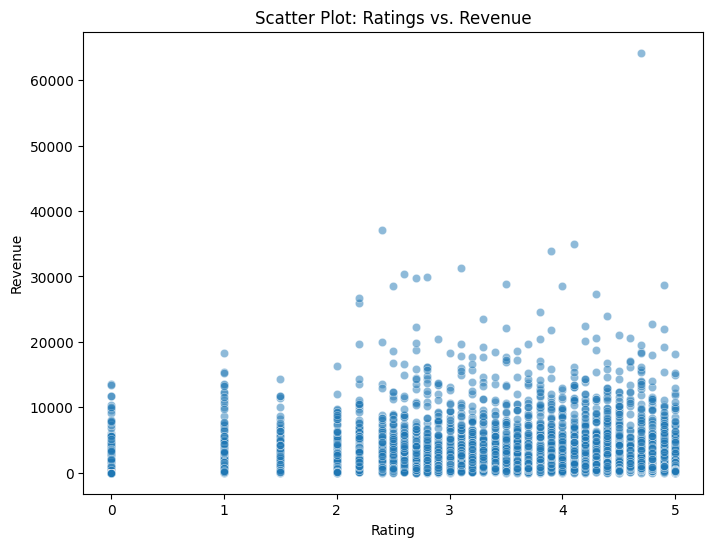

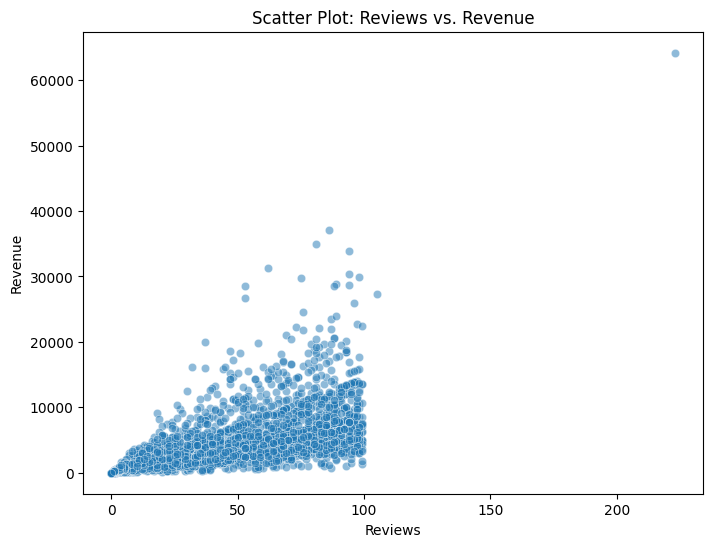

In [64]:
# Scatter Plots: Explore relationships between numerical variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=products, x='rating', y='revenue', alpha=0.5)
plt.title('Scatter Plot: Ratings vs. Revenue')
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=products, x='reviews', y='revenue', alpha=0.5)
plt.title('Scatter Plot: Reviews vs. Revenue')
plt.xlabel('Reviews')
plt.ylabel('Revenue')
plt.show()

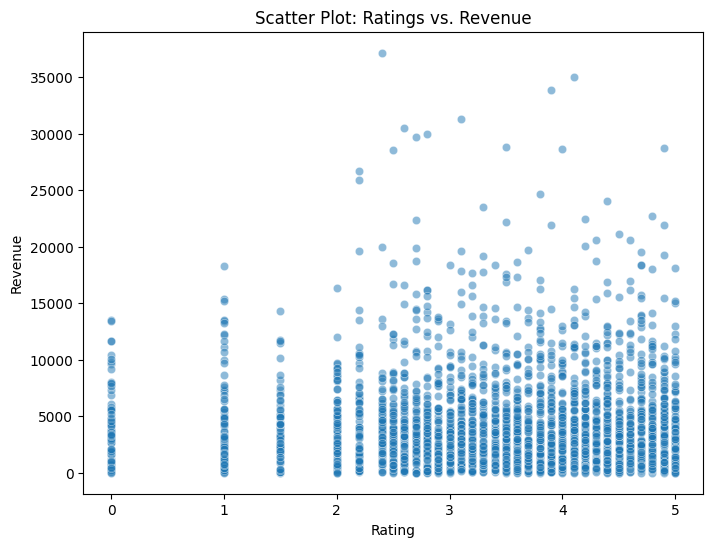

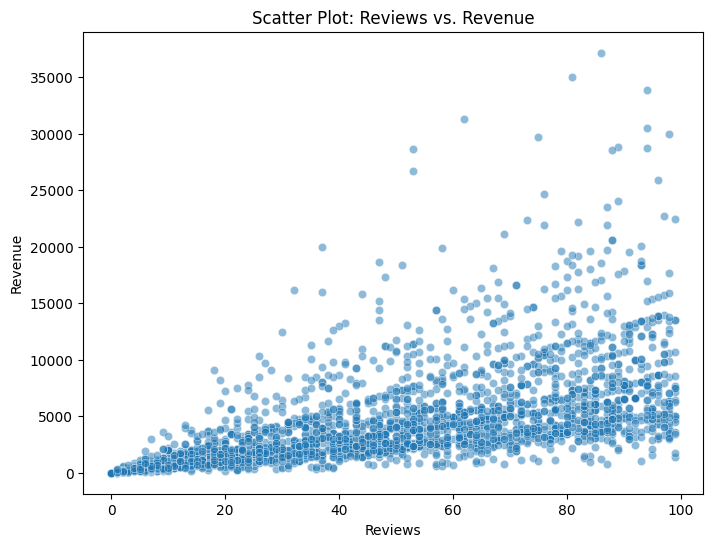

In [65]:
# Scatter Plots: Explore relationships between numerical variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=adidas, x='rating', y='revenue', alpha=0.5)
plt.title('Scatter Plot: Ratings vs. Revenue')
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=adidas, x='reviews', y='revenue', alpha=0.5)
plt.title('Scatter Plot: Reviews vs. Revenue')
plt.xlabel('Reviews')
plt.ylabel('Revenue')
plt.show()

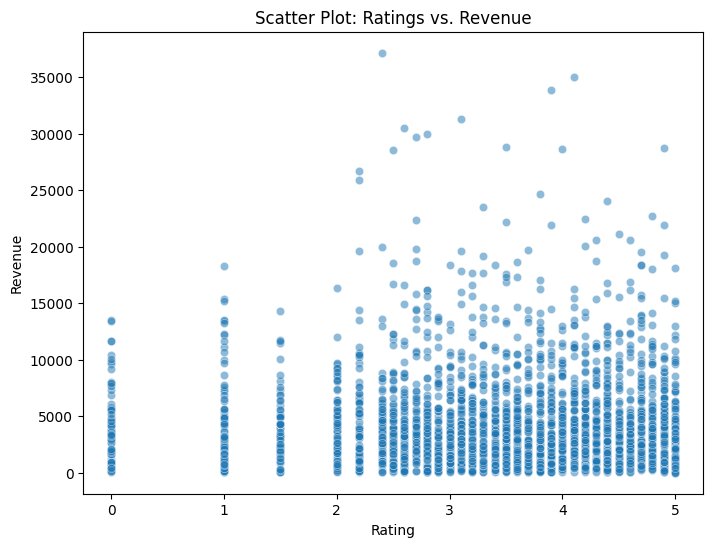

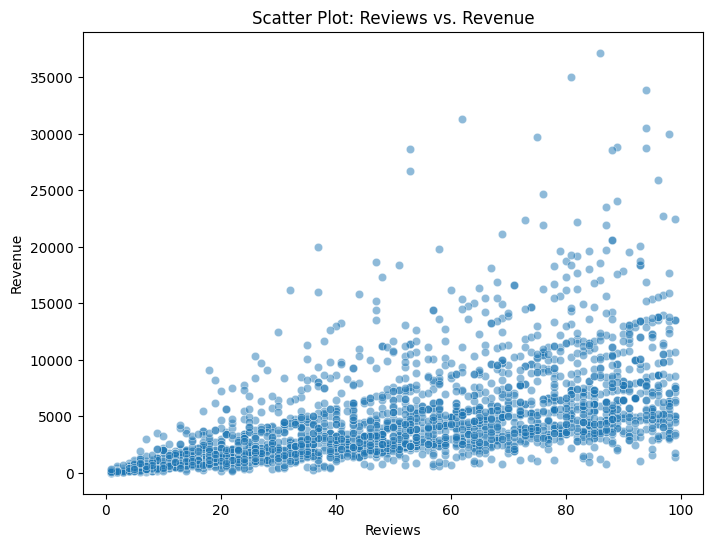

In [66]:
# Scatter Plots: Explore relationships between numerical variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=adidas_sans0rev, x='rating', y='revenue', alpha=0.5)
plt.title('Scatter Plot: Ratings vs. Revenue')
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=adidas_sans0rev, x='reviews', y='revenue', alpha=0.5)
plt.title('Scatter Plot: Reviews vs. Revenue')
plt.xlabel('Reviews')
plt.ylabel('Revenue')
plt.show()

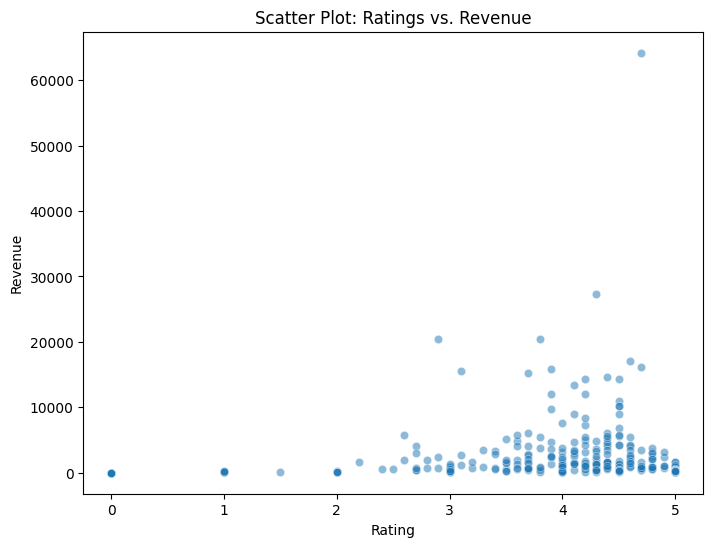

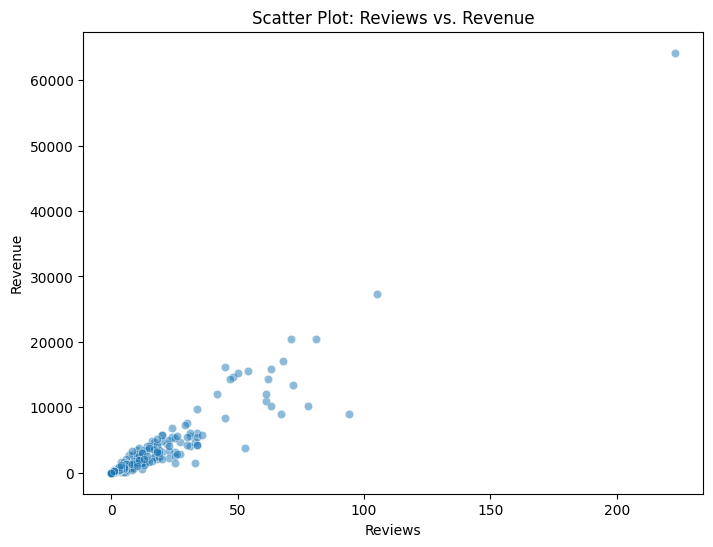

In [67]:
# Scatter Plots: Explore relationships between numerical variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=nike, x='rating', y='revenue', alpha=0.5)
plt.title('Scatter Plot: Ratings vs. Revenue')
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=nike, x='reviews', y='revenue', alpha=0.5)
plt.title('Scatter Plot: Reviews vs. Revenue')
plt.xlabel('Reviews')
plt.ylabel('Revenue')
plt.show()

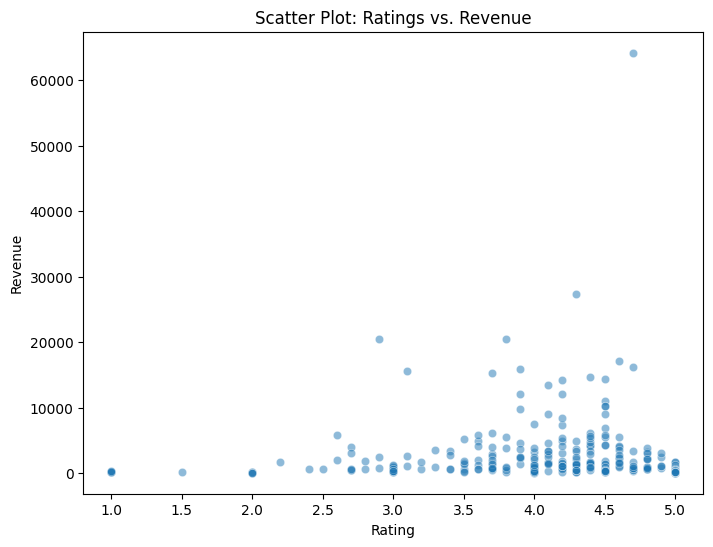

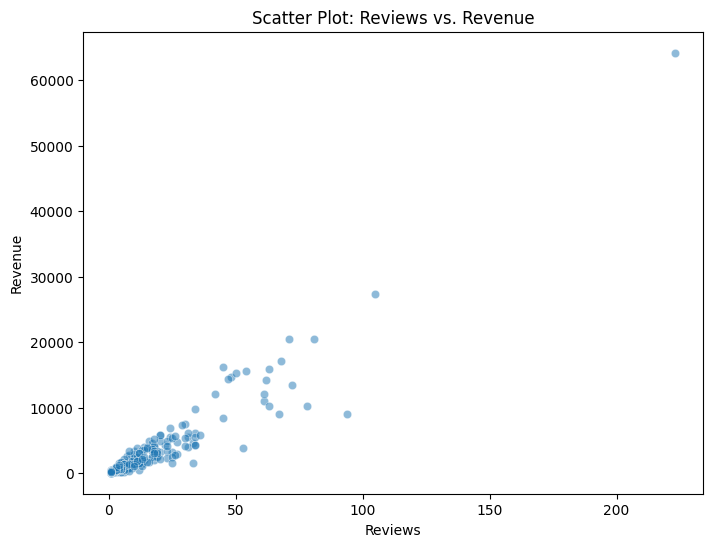

In [68]:
# Scatter Plots: Explore relationships between numerical variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=nike_sans0rev, x='rating', y='revenue', alpha=0.5)
plt.title('Scatter Plot: Ratings vs. Revenue')
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=nike_sans0rev, x='reviews', y='revenue', alpha=0.5)
plt.title('Scatter Plot: Reviews vs. Revenue')
plt.xlabel('Reviews')
plt.ylabel('Revenue')
plt.show()

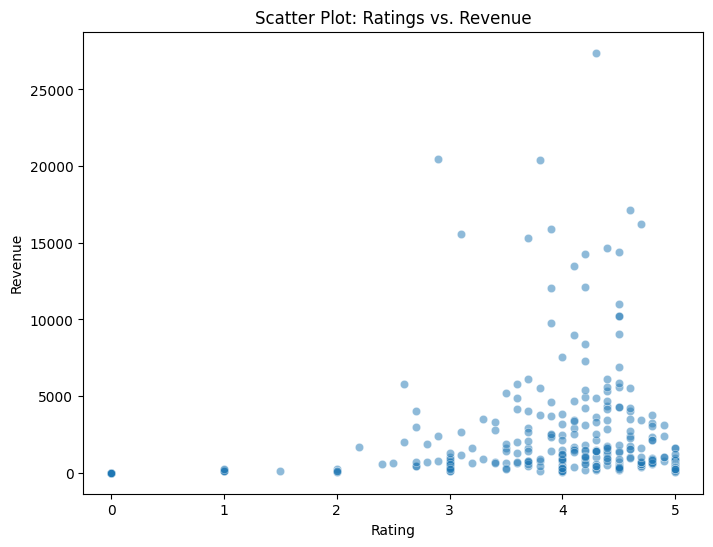

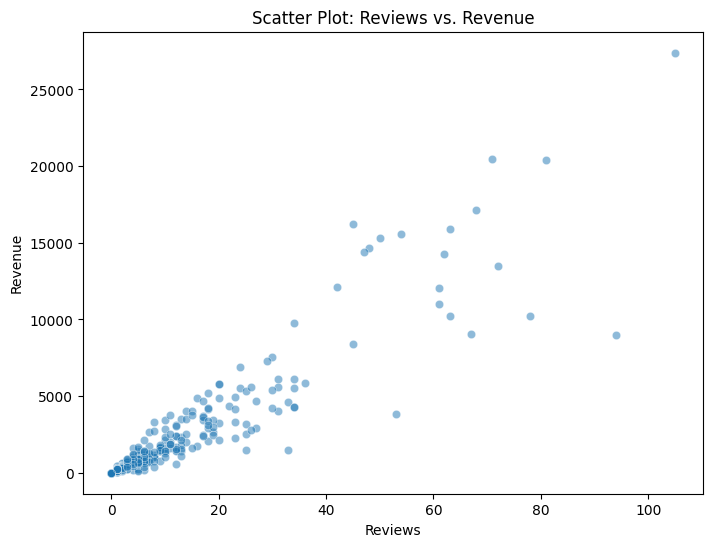

In [69]:
# Scatter Plots: Explore relationships between numerical variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=nike_wo60k, x='rating', y='revenue', alpha=0.5)
plt.title('Scatter Plot: Ratings vs. Revenue')
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=nike_wo60k, x='reviews', y='revenue', alpha=0.5)
plt.title('Scatter Plot: Reviews vs. Revenue')
plt.xlabel('Reviews')
plt.ylabel('Revenue')
plt.show()

### Bar Tables

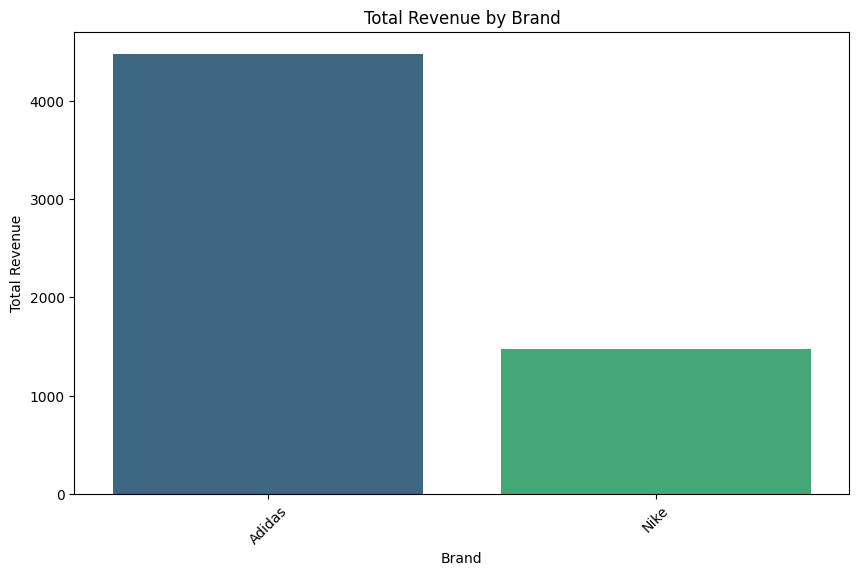

In [70]:
# Bar Charts: Compare categorical variables
plt.figure(figsize=(10, 6))
sns.barplot(data=products, x='brand', y='revenue', ci=None, palette='viridis')
plt.title('Total Revenue by Brand')
plt.xlabel('Brand')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [71]:
SELECT brand, ROUND(AVG(listing_price),2) AS avg_fullprice, ROUND(AVG(sale_price),2) AS avg_saleprice, (1 - ROUND(AVG(sale_price_percent),2)) AS avg_discount, ROUND(AVG(revenue),2) AS avg_revenue,  ROUND(AVG(rating),2) AS avg_rating, ROUND(AVG(reviews), 2) AS avg_reviews FROM no_rev GROUP BY brand

brand  avg_fullprice  avg_saleprice  ...  avg_revenue  avg_rating  avg_reviews
0  Adidas          75.78          51.23  ...      4520.24        3.37        49.24
1    Nike          46.45         102.93  ...      2241.01        4.24        11.36

[2 rows x 7 columns]

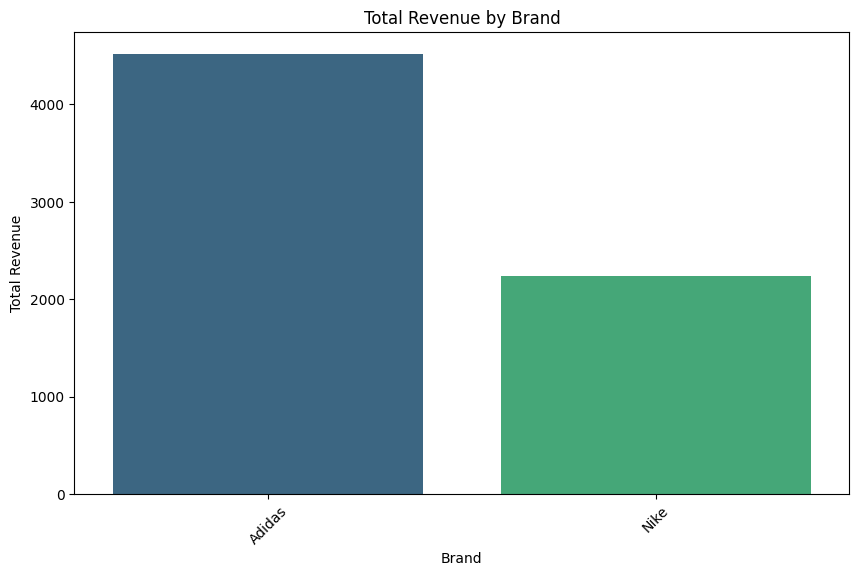

In [72]:
# Bar Charts: Compare categorical variables
plt.figure(figsize=(10, 6))
sns.barplot(data=no_rev, x='brand', y='revenue', ci=None, palette='viridis')
plt.title('Total Revenue by Brand')
plt.xlabel('Brand')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

### Box Plots

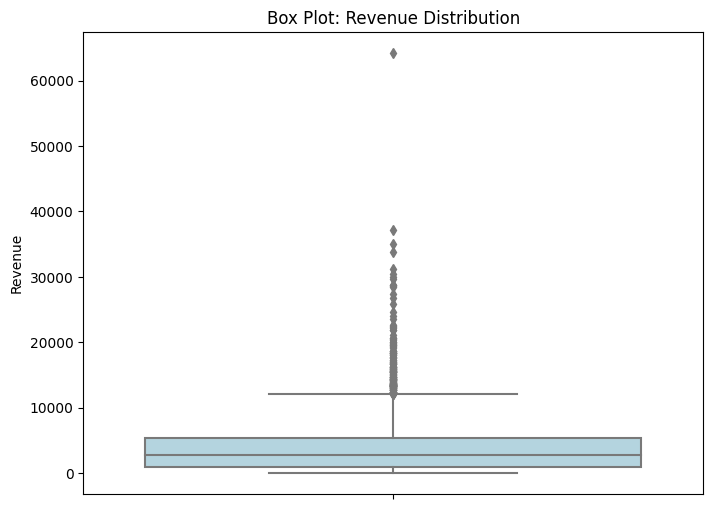

In [73]:
# Box Plots: Visualize the distribution of numerical variables
plt.figure(figsize=(8, 6))
sns.boxplot(data=products, y='revenue', color='lightblue')
plt.title('Box Plot: Revenue Distribution')
plt.ylabel('Revenue')
plt.show()

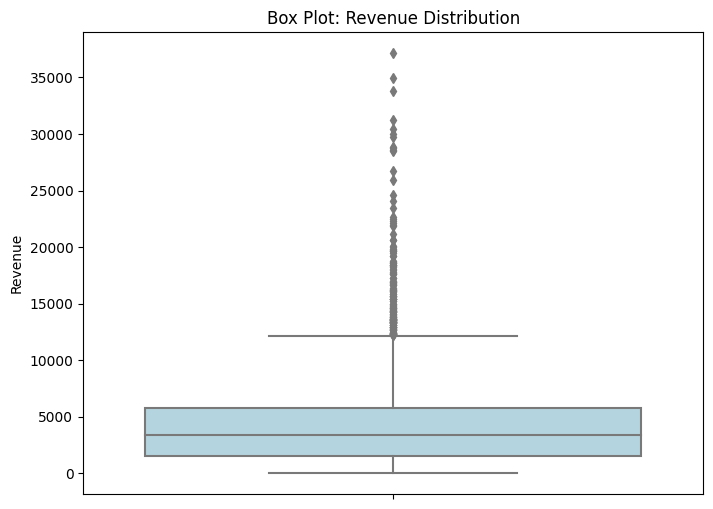

In [74]:
# Box Plots: Visualize the distribution of numerical variables
plt.figure(figsize=(8, 6))
sns.boxplot(data=adidas, y='revenue', color='lightblue')
plt.title('Box Plot: Revenue Distribution')
plt.ylabel('Revenue')
plt.show()

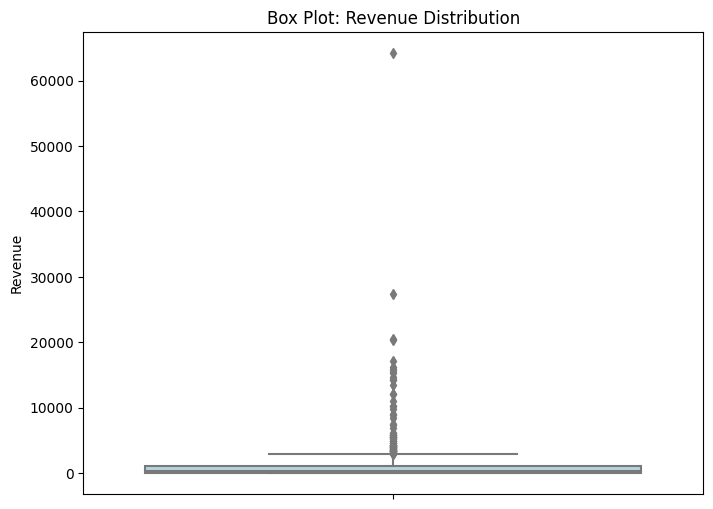

In [75]:
# Box Plots: Visualize the distribution of numerical variables
plt.figure(figsize=(8, 6))
sns.boxplot(data=nike, y='revenue', color='lightblue')
plt.title('Box Plot: Revenue Distribution')
plt.ylabel('Revenue')
plt.show()

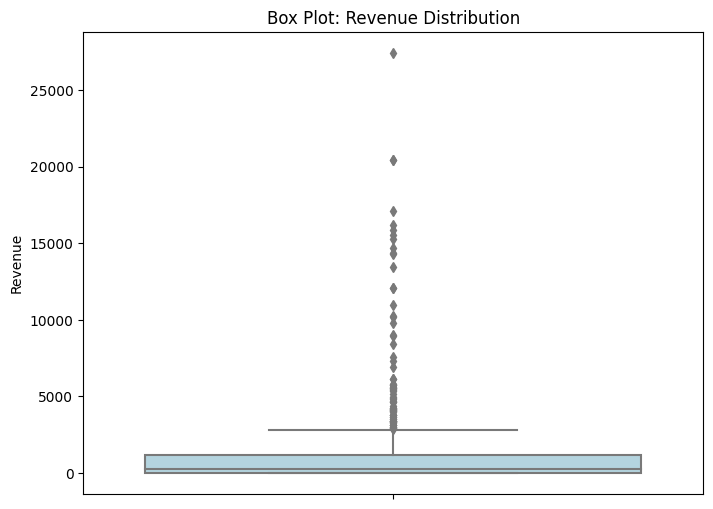

In [76]:
# Box Plots: Visualize the distribution of numerical variables
plt.figure(figsize=(8, 6))
sns.boxplot(data=nike_wo60k, y='revenue', color='lightblue')
plt.title('Box Plot: Revenue Distribution')
plt.ylabel('Revenue')
plt.show()

### Correlation Heatmaps

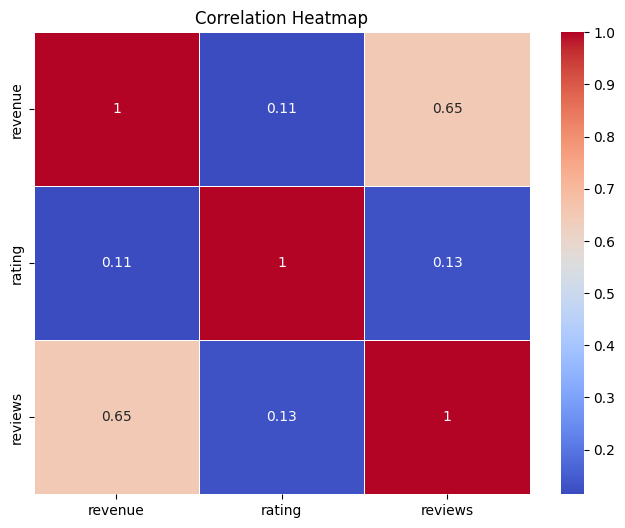

In [77]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = products[['revenue', 'rating', 'reviews']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

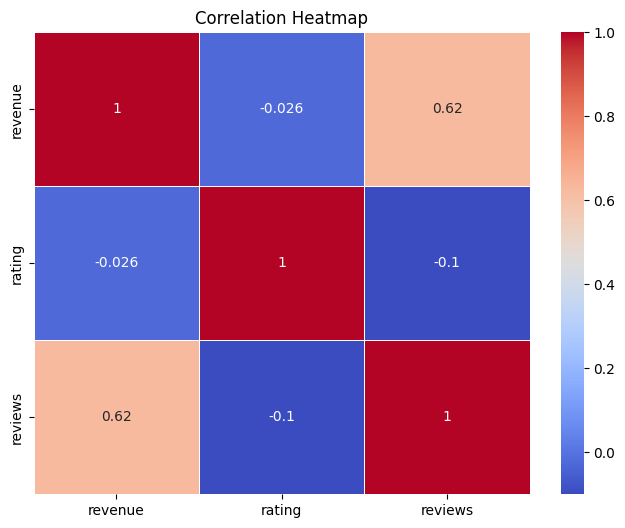

In [78]:
plt.figure(figsize=(8, 6))
correlation_matrix = no_rev[['revenue', 'rating', 'reviews']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

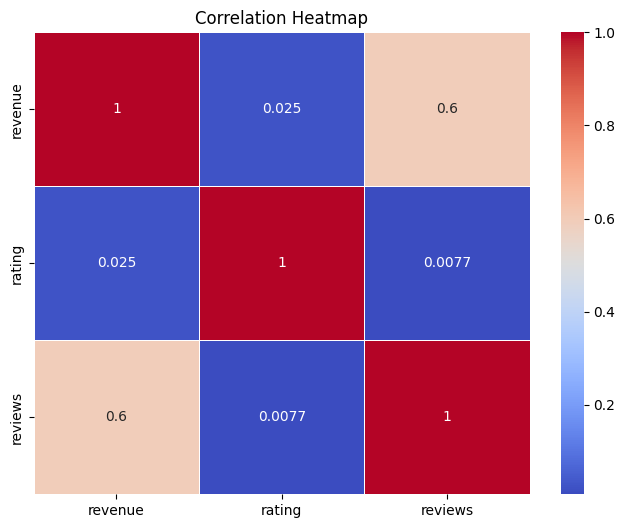

In [79]:
plt.figure(figsize=(8, 6))
correlation_matrix = adidas[['revenue', 'rating', 'reviews']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

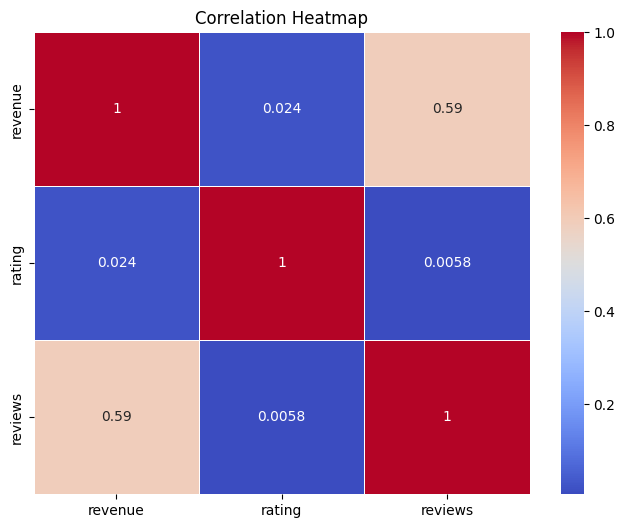

In [80]:
plt.figure(figsize=(8, 6))
correlation_matrix = adidas_sans0rev[['revenue', 'rating', 'reviews']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

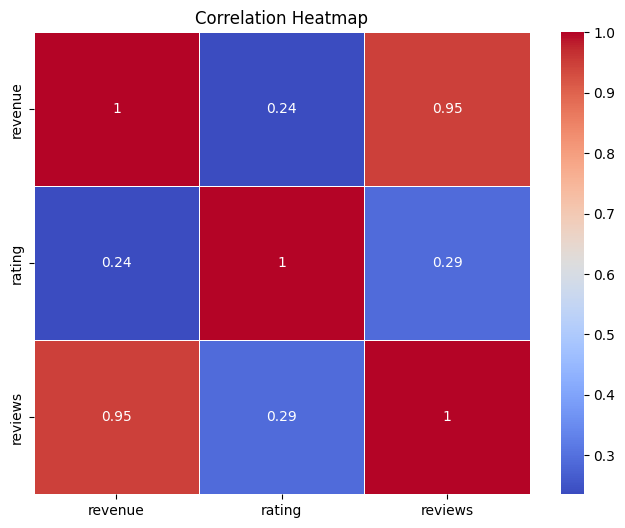

In [81]:
plt.figure(figsize=(8, 6))
correlation_matrix = nike[['revenue', 'rating', 'reviews']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

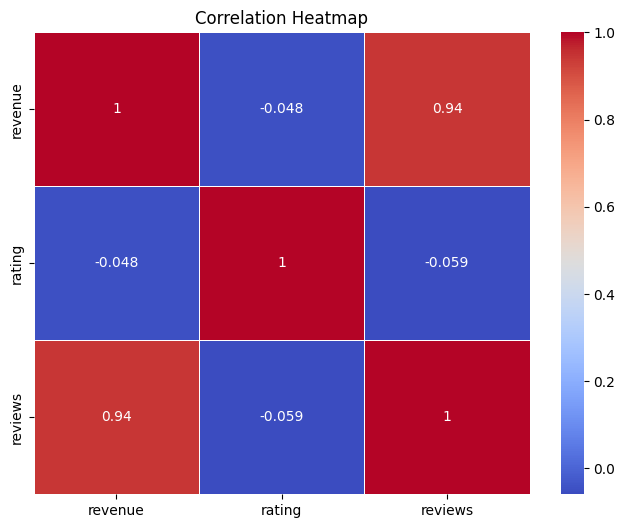

In [82]:
plt.figure(figsize=(8, 6))
correlation_matrix = nike_sans0rev[['revenue', 'rating', 'reviews']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### More specific dives...

### Identifying the top-performing brand, revenue and product count distributions

In [83]:
# Identifying top-performing brand: Adidas

total_revenue = round(sum(products['revenue']),2)
print(total_revenue)

12328902.34


In [84]:
# Revenue by Brand

# Initialize divisor values
adidas_rev = products[products['brand'] == 'Adidas']['revenue'].sum()
a_rev_percent = round((adidas_rev / total_revenue), 2)
nike_rev = products[products['brand'] == 'Nike']['revenue'].sum()
n_rev_percent = round((nike_rev / total_revenue), 2)

print('Product Revenue By Brand:')
print(f'Adidas: ${adidas_rev} ({a_rev_percent})')
print(f'Nike: ${nike_rev} ({n_rev_percent})')


Product Revenue By Brand:
Adidas: $11526619.08 (0.93)
Nike: $802283.26 (0.07)


In [85]:
# Product Count by Brand
total_products = products['product_id'].nunique()

# Initialize divisor values
adidas_ct = products[products['brand'] == 'Adidas']['product_id'].nunique()
a_ct_percent = round((adidas_ct / total_products), 2)
nike_ct = products[products['brand'] == 'Nike']['product_id'].nunique()
n_ct_percent = round((nike_ct / total_products), 2)

print('Product Distribution By Brand:')
print(f'Adidas: {adidas_ct} ({a_ct_percent})')
print(f'Nike: {nike_ct} ({n_ct_percent})')


Product Distribution By Brand:
Adidas: 2575 (0.83)
Nike: 545 (0.17)


### Top-performing products

In [86]:
# Identifying top-performing products

# Create the 'percent_revenue' column
products['percent_revenue'] = 0.0  # Initialize the column with zeros

# Iterate through rows and calculate percent revenue
for index, row in products.iterrows():
    brand = row['brand']
    divisor = adidas_rev if brand == 'Adidas' else nike_rev
    products.at[index, 'percent_revenue'] = row['revenue'] / divisor

products.head()


product_id   brand  ...  gender_category  percent_revenue
1     G27341  Adidas  ...           female         0.000142
2     CM0081  Adidas  ...           female         0.000035
3     B44832  Adidas  ...           female         0.000191
4     D98205  Adidas  ...           female         0.000450
5     B75586  Adidas  ...           female         0.000135

[5 rows x 13 columns]

In [87]:
SELECT * FROM products ORDER BY revenue DESC LIMIT 10

product_id   brand  ...  gender_category  percent_revenue
0  310805-137    Nike  ...      unspecified         0.080027
1      FV7826  Adidas  ...      unspecified         0.003223
2      FV6794  Adidas  ...      unspecified         0.003036
3      EG5185  Adidas  ...             male         0.002936
4      EF9623  Adidas  ...             male         0.002711
5      EF0893  Adidas  ...             male         0.002642
6      EG0761  Adidas  ...           female         0.002601
7      EF2335  Adidas  ...      unspecified         0.002577
8      EG1071  Adidas  ...           female         0.002502
9      EG5933  Adidas  ...             male         0.002495

[10 rows x 13 columns]

###  Impact of discounts on revenue

REDO: 
- Some products don't have a listing price and only a sales price
- Recalculate max revenue based on this
- Determine if all have a discout
- Take sale_price and divide by discount if cheaper of two => otherwise keep sale_price
- if listing_price is 0, take sales_price

In [88]:
# Assumption: all revenue at discounted price

# Possible revenue is total revenue "possible" at 'listing_price'
products['possible_revenue'] = products['revenue'] / products['discount']


products.head()

product_id   brand  ...  percent_revenue  possible_revenue
1     G27341  Adidas  ...         0.000142          3282.340
2     CM0081  Adidas  ...         0.000035           997.325
3     B44832  Adidas  ...         0.000191          4408.740
4     D98205  Adidas  ...         0.000450         10365.400
5     B75586  Adidas  ...         0.000135          2592.000

[5 rows x 14 columns]

In [89]:
SELECT * FROM products WHERE product_id = '310805-137'

product_id brand  ...  percent_revenue  possible_revenue
0  310805-137  Nike  ...         0.080027               inf

[1 rows x 14 columns]

In [90]:
SElECT * FROM products WHERE discount < 0

Empty DataFrame
Columns: [product_id, brand, listing_price, sale_price, discount, revenue, product_name, description, rating, reviews, sale_price_percent, gender_category, percent_revenue, possible_revenue]
Index: []

### Relationship between product descriptions and ratings / reviews

In [91]:
SELECT * FROM products WHERE reviews = 0

product_id   brand  ...  percent_revenue  possible_revenue
0        CL7507  Adidas  ...              0.0               0.0
1        CK9678  Adidas  ...              0.0               0.0
2        CM0014  Adidas  ...              0.0               0.0
3        EE9728  Adidas  ...              0.0               0.0
4        CL9968  Adidas  ...              0.0               0.0
..          ...     ...  ...              ...               ...
207  CI3867-001    Nike  ...              0.0               NaN
208  CQ0278-200    Nike  ...              0.0               NaN
209  AT7968-606    Nike  ...              0.0               NaN
210  AT6100-606    Nike  ...              0.0               NaN
211  CJ9585-600    Nike  ...              0.0               NaN

[212 rows x 14 columns]

In [92]:
SELECT * FROM products WHERE description is null

product_id brand  ...  percent_revenue  possible_revenue
0  CD4371-001  Nike  ...         0.021351               inf
1  CD4372-004  Nike  ...         0.009106               inf
2  CD8526-446  Nike  ...         0.001570               inf

[3 rows x 14 columns]

In [93]:
SELECT * FROM products WHERE revenue = 0 AND rating = 0 AND reviews = 0

product_id   brand  ...  percent_revenue  possible_revenue
0        EG7155  Adidas  ...              0.0               NaN
1    CJ1646-600    Nike  ...              0.0               NaN
2    CT4328-101    Nike  ...              0.0               NaN
3    CI3482-200    Nike  ...              0.0               NaN
4    CD0479-200    Nike  ...              0.0               NaN
..          ...     ...  ...              ...               ...
183  CI3867-001    Nike  ...              0.0               NaN
184  CQ0278-200    Nike  ...              0.0               NaN
185  AT7968-606    Nike  ...              0.0               NaN
186  AT6100-606    Nike  ...              0.0               NaN
187  CJ9585-600    Nike  ...              0.0               NaN

[188 rows x 14 columns]

In [94]:
SELECT * FROM products WHERE revenue > 0 AND rating = 0

product_id   brand  ...  percent_revenue  possible_revenue
0      CK9664  Adidas  ...         0.000080          1835.380
1      EE3625  Adidas  ...         0.001174         27068.620
2      CM0031  Adidas  ...         0.000176          4055.440
3      F35028  Adidas  ...         0.000105          2409.580
4      B44697  Adidas  ...         0.000531         12236.940
..        ...     ...  ...              ...               ...
65     DB3389  Adidas  ...         0.000450         12958.200
66     EE6081  Adidas  ...         0.000669         19284.575
67     CL9854  Adidas  ...         0.000039           899.640
68     CL9851  Adidas  ...         0.000288          8291.525
69     CM6032  Adidas  ...         0.000687               inf

[70 rows x 14 columns]

In [95]:
# Text Data Processing
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources (run this once)
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Text preprocessing function
def preprocess_text(text):
    if pd.notna(text):  # Check for missing values
        # Remove punctuation and convert to lowercase
        text = text.lower()
        text = "".join([char for char in text if char.isalpha() or char.isspace()])
        return text
    else:
        return ""  # Handle missing values by returning an empty string

# Apply text preprocessing to the 'description' column
products['clean_description'] = products['description'].apply(preprocess_text)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/repl/nltk_data...
[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [96]:
# Apply text preprocessing to the 'description' column for other dataframes
no_rev['clean_description'] = no_rev['description'].apply(preprocess_text)
adidas['clean_description'] = adidas['description'].apply(preprocess_text)
nike['clean_description'] = nike['description'].apply(preprocess_text)

### Exploratory Analysis

            rating      reviews
count  3120.000000  3120.000000
mean      3.265801    41.545513
std       1.392685    31.361668
min       0.000000     0.000000
25%       2.600000    12.000000
50%       3.500000    39.000000
75%       4.400000    69.000000
max       5.000000   223.000000


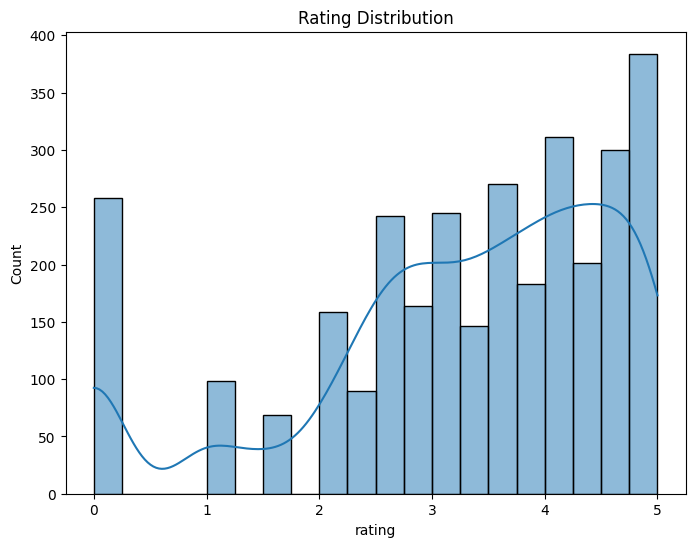

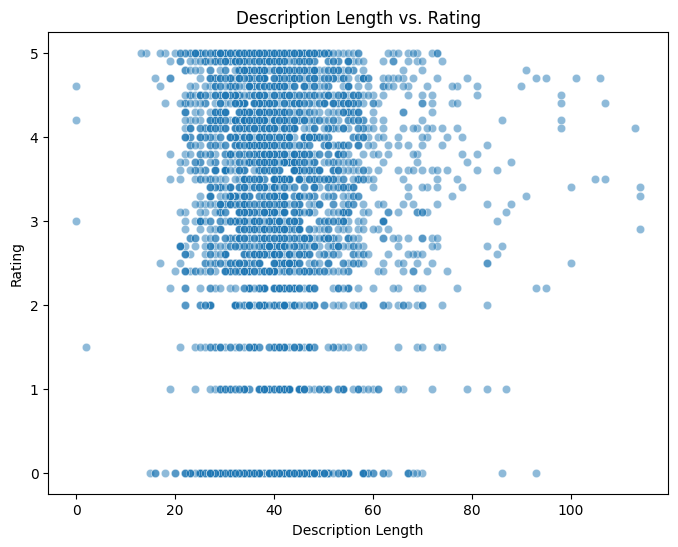

In [97]:
# Exploratory Analysis

# Basic statistics
print(products[['rating', 'reviews']].describe())

# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(products['rating'], bins=20, kde=True)
plt.title('Rating Distribution')
plt.show()

# Relationship between description length and ratings/reviews
products['description_length'] = products['clean_description'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.scatterplot(data=products, x='description_length', y='rating', alpha=0.5)
plt.title('Description Length vs. Rating')
plt.xlabel('Description Length')
plt.ylabel('Rating')
plt.show()

            rating      reviews
count  2908.000000  2908.000000
mean      3.476204    44.574278
std       1.156500    30.335306
min       0.000000     1.000000
25%       2.800000    17.000000
50%       3.600000    43.000000
75%       4.400000    71.000000
max       5.000000   223.000000


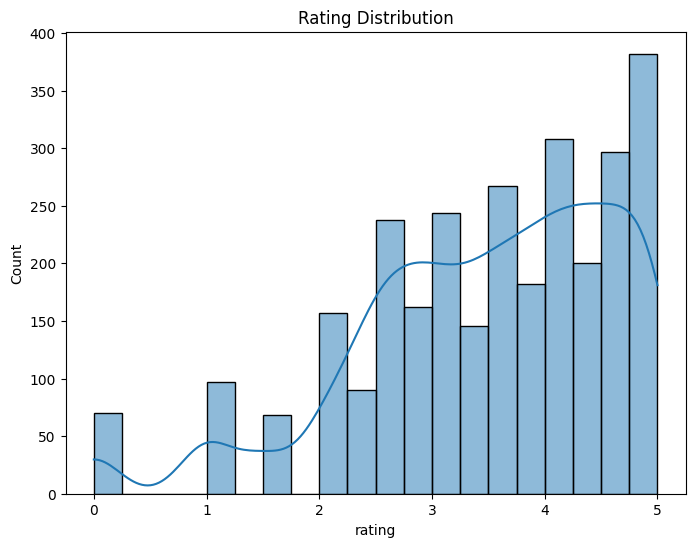

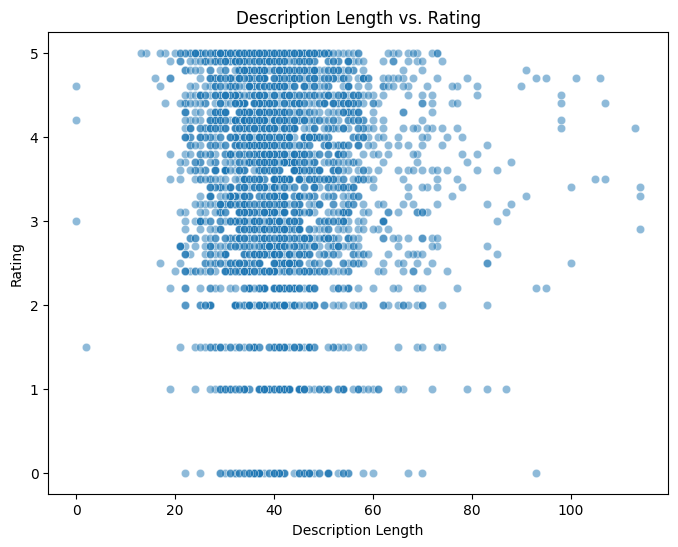

In [98]:
# Exploratory Analysis

# Basic statistics
print(no_rev[['rating', 'reviews']].describe())

# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(no_rev['rating'], bins=20, kde=True)
plt.title('Rating Distribution')
plt.show()

# Relationship between description length and ratings/reviews
no_rev['description_length'] = no_rev['clean_description'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.scatterplot(data=no_rev, x='description_length', y='rating', alpha=0.5)
plt.title('Description Length vs. Rating')
plt.xlabel('Description Length')
plt.ylabel('Rating')
plt.show()

            rating      reviews
count  2575.000000  2575.000000
mean      3.367184    48.758835
std       1.158073    28.899252
min       0.000000     0.000000
25%       2.700000    24.000000
50%       3.500000    49.000000
75%       4.300000    74.000000
max       5.000000    99.000000


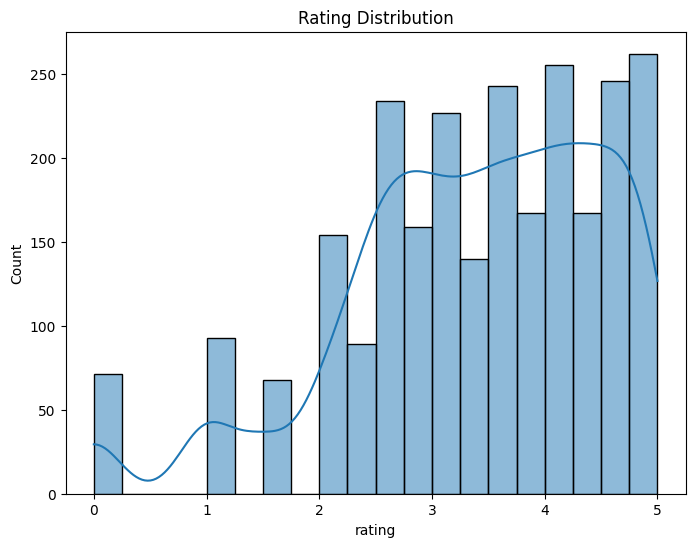

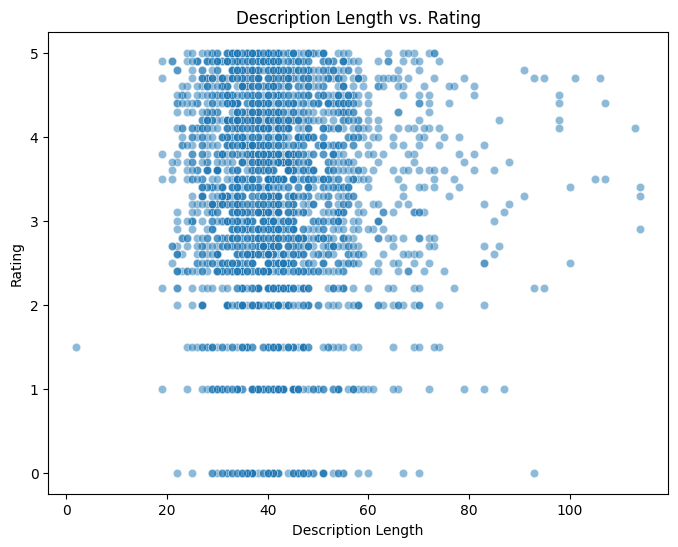

In [99]:
# Exploratory Analysis

# Basic statistics
print(adidas[['rating', 'reviews']].describe())

# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(adidas['rating'], bins=20, kde=True)
plt.title('Rating Distribution')
plt.show()

# Relationship between description length and ratings/reviews
adidas['description_length'] = adidas['clean_description'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.scatterplot(data=adidas, x='description_length', y='rating', alpha=0.5)
plt.title('Description Length vs. Rating')
plt.xlabel('Description Length')
plt.ylabel('Rating')
plt.show()

            rating      reviews
count  2550.000000  2550.000000
mean      3.368627    49.236863
std       1.157189    28.632360
min       0.000000     1.000000
25%       2.700000    24.000000
50%       3.500000    49.000000
75%       4.300000    74.000000
max       5.000000    99.000000


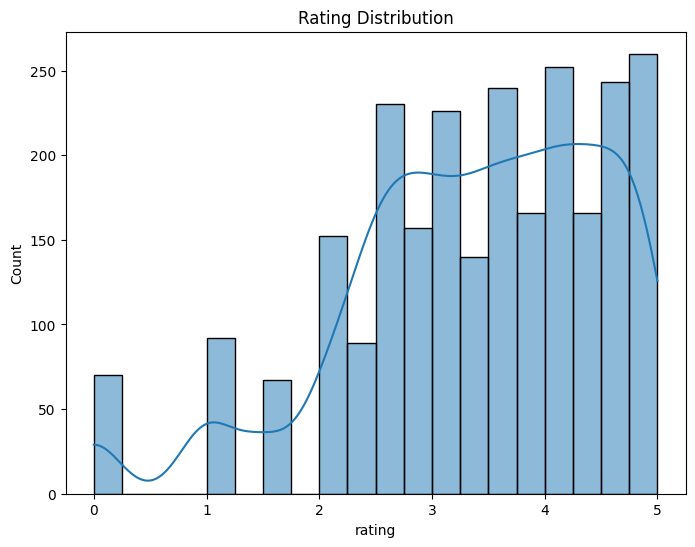

KeyError: 'clean_description'

In [ ]:
# Exploratory Analysis

# Basic statistics
print(adidas_sans0rev[['rating', 'reviews']].describe())

# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(adidas_sans0rev['rating'], bins=20, kde=True)
plt.title('Rating Distribution')
plt.show()

# Relationship between description length and ratings/reviews
adidas_sans0rev['description_length'] = adidas_sans0rev['clean_description'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.scatterplot(data=nike, x='description_length', y='rating', alpha=0.5)
plt.title('Description Length vs. Rating')
plt.xlabel('Description Length')
plt.ylabel('Rating')
plt.show()

           rating     reviews
count  545.000000  545.000000
mean     2.786789    7.464220
std      2.120421   16.658748
min      0.000000    0.000000
25%      0.000000    0.000000
50%      3.900000    2.000000
75%      4.600000    7.000000
max      5.000000  223.000000


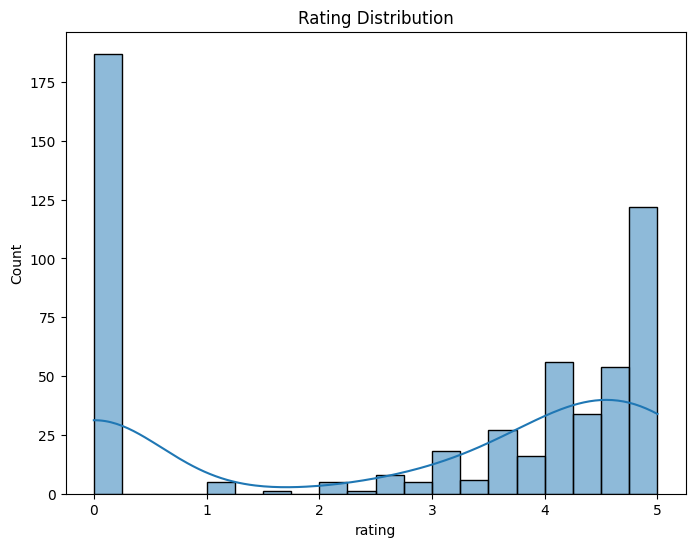

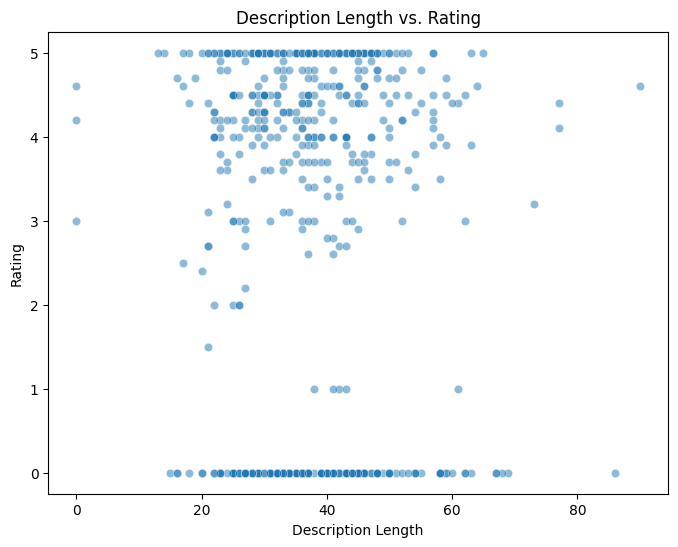

In [599]:
# Exploratory Analysis

# Basic statistics
print(nike[['rating', 'reviews']].describe())

# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(nike['rating'], bins=20, kde=True)
plt.title('Rating Distribution')
plt.show()

# Relationship between description length and ratings/reviews
nike['description_length'] = nike['clean_description'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.scatterplot(data=nike, x='description_length', y='rating', alpha=0.5)
plt.title('Description Length vs. Rating')
plt.xlabel('Description Length')
plt.ylabel('Rating')
plt.show()

In [ ]:
# Exploratory Analysis

# Basic statistics
print(nike_sans0rev[['rating', 'reviews']].describe())

# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(nike_sans0rev['rating'], bins=20, kde=True)
plt.title('Rating Distribution')
plt.show()

# Relationship between description length and ratings/reviews
nike_sans0rev['description_length'] = nike_sans0rev['clean_description'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.scatterplot(data=nike, x='description_length', y='rating', alpha=0.5)
plt.title('Description Length vs. Rating')
plt.xlabel('Description Length')
plt.ylabel('Rating')
plt.show()

### Sentiment Analysis

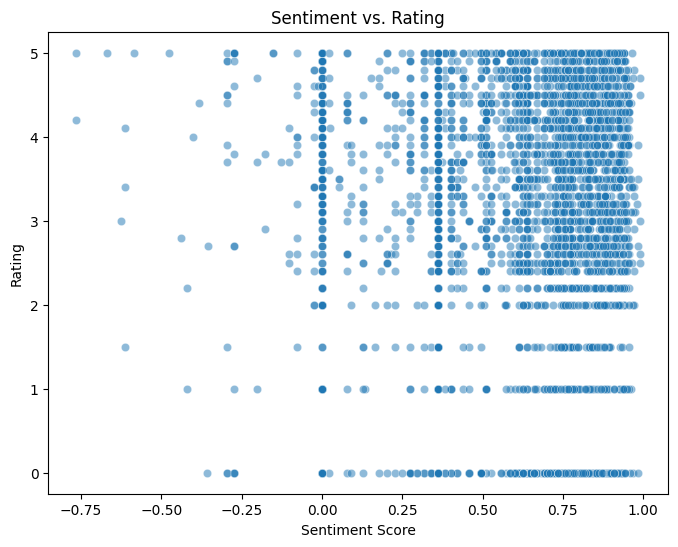

In [600]:
# Sentiment Analysis

# Sentiment analysis function
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Calculate sentiment scores for descriptions
products['sentiment_score'] = products['clean_description'].apply(get_sentiment)

# Explore the relationship between sentiment and ratings/reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(data=products, x='sentiment_score', y='rating', alpha=0.5)
plt.title('Sentiment vs. Rating')
plt.xlabel('Sentiment Score')
plt.ylabel('Rating')
plt.show()

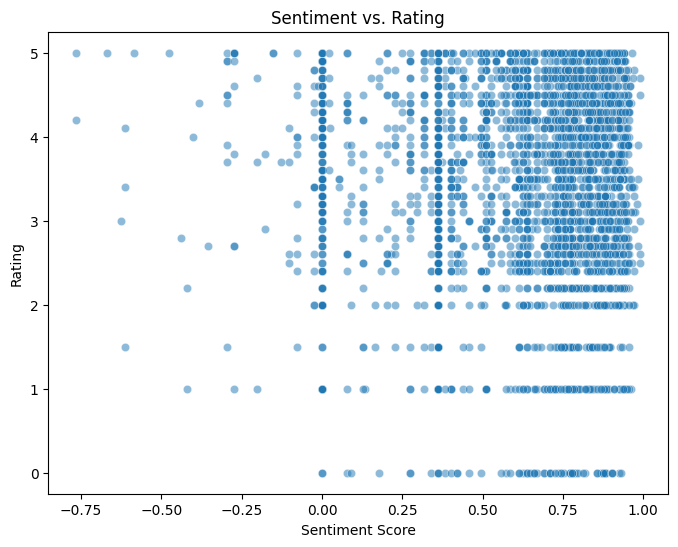

In [601]:
# Sentiment Analysis

# Sentiment analysis function
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Calculate sentiment scores for descriptions
no_rev['sentiment_score'] = no_rev['clean_description'].apply(get_sentiment)

# Explore the relationship between sentiment and ratings/reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(data=no_rev, x='sentiment_score', y='rating', alpha=0.5)
plt.title('Sentiment vs. Rating')
plt.xlabel('Sentiment Score')
plt.ylabel('Rating')
plt.show()

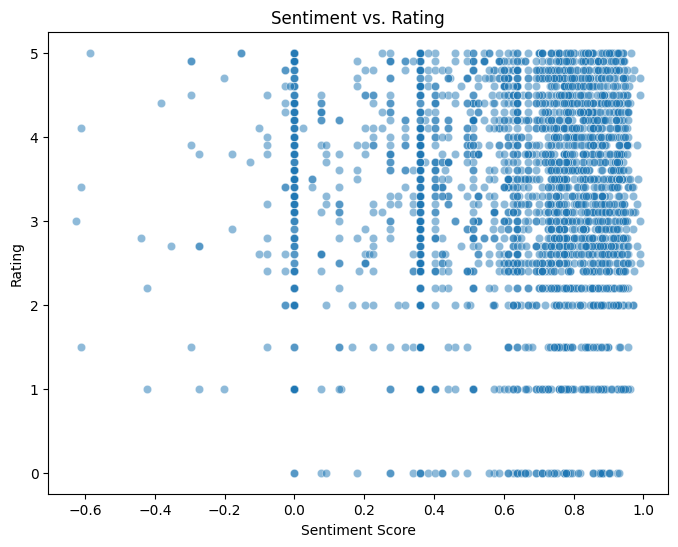

In [602]:
# Sentiment Analysis

# Sentiment analysis function
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Calculate sentiment scores for descriptions
adidas['sentiment_score'] = adidas['clean_description'].apply(get_sentiment)

# Explore the relationship between sentiment and ratings/reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(data=adidas, x='sentiment_score', y='rating', alpha=0.5)
plt.title('Sentiment vs. Rating')
plt.xlabel('Sentiment Score')
plt.ylabel('Rating')
plt.show()

In [ ]:
# Sentiment Analysis

# Sentiment analysis function
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Calculate sentiment scores for descriptions
adidas_sans0rev['sentiment_score'] = adidas_sans0rev['clean_description'].apply(get_sentiment)

# Explore the relationship between sentiment and ratings/reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(data=adidas_sans0rev, x='sentiment_score', y='rating', alpha=0.5)
plt.title('Sentiment vs. Rating')
plt.xlabel('Sentiment Score')
plt.ylabel('Rating')
plt.show()

KeyError: 'clean_description'

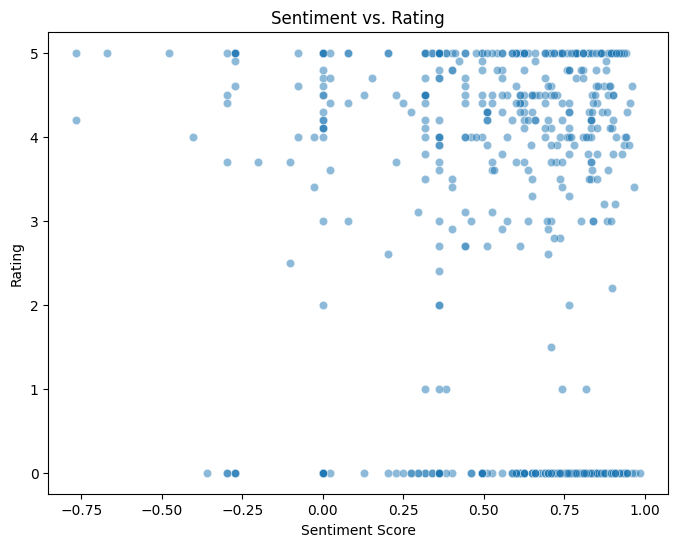

In [492]:
# Sentiment Analysis

# Sentiment analysis function
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Calculate sentiment scores for descriptions
nike['sentiment_score'] = nike['clean_description'].apply(get_sentiment)

# Explore the relationship between sentiment and ratings/reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(data=nike, x='sentiment_score', y='rating', alpha=0.5)
plt.title('Sentiment vs. Rating')
plt.xlabel('Sentiment Score')
plt.ylabel('Rating')
plt.show()

In [ ]:
# Sentiment Analysis

# Sentiment analysis function
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Calculate sentiment scores for descriptions
nike_sans0rev['sentiment_score'] = nike_sans0rev['clean_description'].apply(get_sentiment)

# Explore the relationship between sentiment and ratings/reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(data=nike_sans0rev, x='sentiment_score', y='rating', alpha=0.5)
plt.title('Sentiment vs. Rating')
plt.xlabel('Sentiment Score')
plt.ylabel('Rating')
plt.show()

### Correlation Analysis

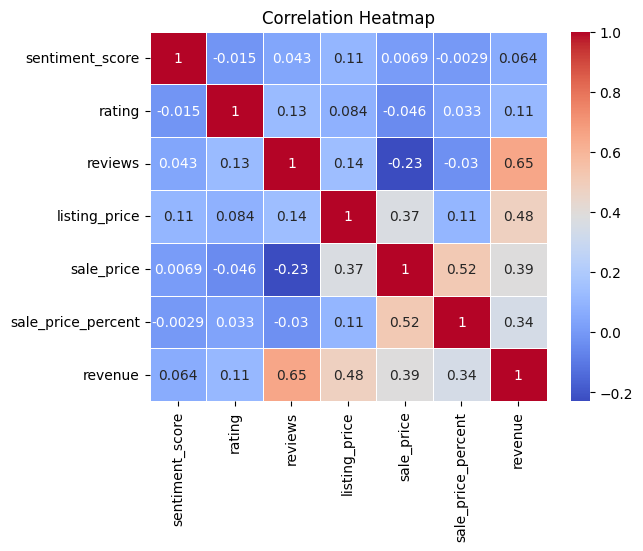

In [499]:
# Correlation Analysis
correlation_matrix = products[['sentiment_score', 'rating', 'reviews', 'listing_price', 'sale_price', 'sale_price_percent', 'revenue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

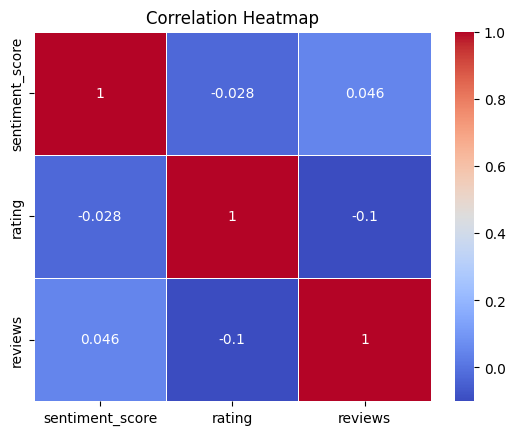

In [494]:
# Correlation Analysis
correlation_matrix = no_rev[['sentiment_score', 'rating', 'listing_price', 'sale_price', 'sale_price_percent', 'revenue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


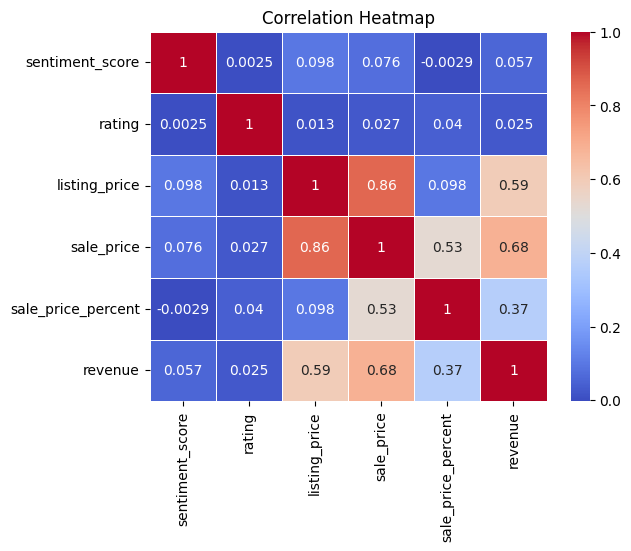

In [501]:
# Correlation Analysis
correlation_matrix = adidas[['sentiment_score', 'rating', 'listing_price', 'sale_price', 'sale_price_percent', 'revenue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Correlation Analysis
correlation_matrix = adidas_sans0rev[['sentiment_score', 'rating', 'listing_price', 'sale_price', 'sale_price_percent', 'revenue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

KeyError: "['sentiment_score'] not in index"

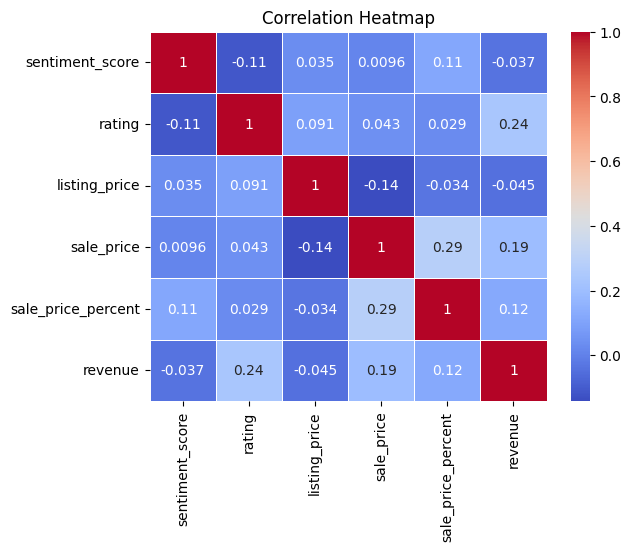

In [500]:
# Correlation Analysis
correlation_matrix = nike[['sentiment_score', 'rating', 'listing_price', 'sale_price', 'sale_price_percent', 'revenue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Correlation Analysis
correlation_matrix = nike_sans0rev[['sentiment_score', 'rating', 'listing_price', 'sale_price', 'sale_price_percent', 'revenue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 4. Recommendations
- Based on your analysis, generate insights and recommendations for the marketing and sales teams. 
- For example, you can:
    - Identify top-performing brands or products in terms of revenue, ratings, and reviews.
    - Analyze the impact of discounts on revenue.
    - Explore the relationship between product descriptions and ratings/reviews.
    - Suggest strategies for improving revenue, such as promoting specific products or brands.

### Findings



### Recommendations
- Time Series Plots: If your data has a time component, create time series plots to analyze trends in revenue or other variables over time.
- Further distillation of product mix: For example, of the revenue.... what was at full price or discounted to better understand the makeup of what the products true value was in selling and how we can better effectively advertise it on sale, etc
- Understanding customer's average cart value and shopping preferences

## 5. Data Visualization
- Create visualizations to present your findings in a clear and compelling manner. Use libraries like Matplotlib or Seaborn for this purpose. Some recommended visualizations you can create in Python include:
    - Revenue Analysis:
        - Line chart or bar chart to show revenue trends over time.
        - Stacked bar chart to compare revenue by brand or product category.
    - Ratings and Reviews:
        - Scatter plot to visualize the relationship between product ratings and the number of reviews.
        - Histogram or bar chart to show the distribution of product ratings.
    - Discount Analysis:
        - Bar chart or line chart to compare revenue with and without discounts.
        - Histogram to visualize the distribution of discount percentages.
    - Brand Performance:
        - Stacked bar chart to show the market share of different brands based on revenue.
    - Product Description Analysis:
        - Word cloud or bar chart showing the most frequently used terms in high-rated products' descriptions.

## 6. Documentation
- Create a report or notebook that includes explanations, code, and visualizations to convey your findings and recommendations effectively.

## 7. Tableau Visualizations
- Connect to the datasets you've prepared in Python. You can create a Tableau dashboard that builds upon the insights and visualizations you created in Python.
- Further enhance the visualizations, add interactivity, and create a more polished and user-friendly dashboard. You can implement interactive filters, tooltips, and dynamic visualizations.

## 8. Export and Sharing
- Export your Tableau dashboard as a shareable file or embed it in a report or presentation.
- Include python report / documentation with it to provide full project details